# Setas para Ronald

![setas en el bosque](data/setas_ilustracion.jpg)

## 1. Definición del problema

Se trata de ayudar a Ronald con un modelo que le prediga perfectamente cuales setas on venenosa y cuál no. 

## 2. Recolección y exploración de Datos

### 2.1. Obtener el dataset completo
En este caso concreto, hemos podido comprobar cómo obtener el dataset completo puede ser bastante laborioso según vengan los datos que tenemos. 

Lo primero de todo, cargamos todas las librerías necesarias. 

In [1]:
import pandas as pd
import numpy as np

import sys
import os
import re

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, LabelBinarizer, MultiLabelBinarizer, OneHotEncoder 

In [2]:
import snappy
print(snappy.__version__)

0.7.3


In [3]:
# contenido = snappy.decompress(open("data/train.snappy", "rb").read()) if os.path.exists("data/train.snappy") else "Archivo no encontrado"

In [4]:
pd.read_parquet('data/raw/train.snappy')

,descripcion
0,**La observación** 367 describe una seta de *...
1,**La observación** 5123 describe una seta de ...
2,**La observación** 2864 describe una seta de ...
3,**La observación** 4674 describe una seta de ...
4,**La observación** 1210 describe una seta de ...
...,...
4598,**La observación** 1028 describe una seta de ...
4599,**La observación** 5591 describe una seta de ...
4600,**La observación** 2053 describe una seta de ...
4601,**La observación** 4604 describe una seta de ...


In [5]:
pd.set_option('display.max_colwidth', None)
pd.read_parquet('data/raw/train.snappy').iloc[5:9]

,descripcion
5,"**La observación** 5381 describe una seta de **clase** poisonous. Tiene una **forma de sombrero** flat con una **superficie** smooth **y un color** red. **No presenta** moretones y tiene un **olor** spicy. **Las branquias son de tipo** free con una **separación** close **y un tamaño** narrow. **El color de las branquias es** buff. **La forma del tallo** es tapering y la **raíz del tallo** es ?. **La superficie del tallo por encima del anillo** es silky **y por debajo del anillo** es silky. El **color del tallo por encima del anillo** es pink **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** evanescent **y el color de la impresión de esporas** es white. Se encuentra en una **población** several y su **hábitat es** leaves."
6,"**La observación** 4001 describe una seta de **clase** poisonous. Tiene una **forma de sombrero** convex con una **superficie** smooth **y un color** green. **No presenta** moretones y tiene un **olor** creosote. **Las branquias son de tipo** free con una **separación** close **y un tamaño** narrow. **El color de las branquias es** pink. **La forma del tallo** es enlarging y la **raíz del tallo** es bulbous. **La superficie del tallo por encima del anillo** es smooth **y por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant **y el color de la impresión de esporas** es black. Se encuentra en una **población** several y su **hábitat es** wood."
7,"**La observación** 5168 describe una seta de **clase** poisonous. Tiene una **forma de sombrero** convex con una **superficie** scaly **y un color** red. **No presenta** moretones y tiene un **olor** spicy. **Las branquias son de tipo** free con una **separación** close **y un tamaño** narrow. **El color de las branquias es** buff. **La forma del tallo** es tapering y la **raíz del tallo** es ?. **La superficie del tallo por encima del anillo** es silky **y por debajo del anillo** es silky. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** evanescent **y el color de la impresión de esporas** es white. Se encuentra en una **población** several y su **hábitat es** paths."
8,"**La observación** 14 describe una seta de **clase** edible. Tiene una **forma de sombrero** sunken con una **superficie** fibrous **y un color** green. **No presenta** moretones y tiene un **olor** null. **Las branquias son de tipo** free con una **separación** close **y un tamaño** narrow. **El color de las branquias es** black. **La forma del tallo** es enlarging y la **raíz del tallo** es equal. **La superficie del tallo por encima del anillo** es smooth **y por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant **y el color de la impresión de esporas** es brown. Se encuentra en una **población** solitary y su **hábitat es** urban."


In [6]:
pd.read_parquet('data/raw/train.snappy').iloc[0]

descripcion    **La observación** 367  describe una seta de **clase** edible.  Tiene una **forma de sombrero** bell  con una **superficie** scaly  **y un color** yellow.  **Presenta**  moretones y tiene un **olor** almond.  **Las branquias son de tipo** free  con una **separación** close  **y un tamaño** broad.  **El color de las branquias es** black.  **La forma del tallo** es enlarging  y la **raíz del tallo** es club.  **La superficie del tallo por encima del anillo** es smooth  **y por debajo del anillo** es smooth.  El **color del tallo por encima del anillo** es white  **y por debajo del anillo** es white.  **El tipo de velo** es partial  con un **color de velo** white.  Tiene one **anillo(s)**,  **de tipo** pendant  **y el color de la impresión de esporas** es brown.  Se encuentra en una **población** scattered  y su **hábitat es** grasses.  
Name: 0, dtype: object

In [7]:
datos = pd.read_parquet('data/raw/train.snappy')

In [8]:
#voy a ir alimentando la función con filas de prueba para ver si toma bien los valores
fila= datos.iloc[0:3]
fila

,descripcion
0,"**La observación** 367 describe una seta de **clase** edible. Tiene una **forma de sombrero** bell con una **superficie** scaly **y un color** yellow. **Presenta** moretones y tiene un **olor** almond. **Las branquias son de tipo** free con una **separación** close **y un tamaño** broad. **El color de las branquias es** black. **La forma del tallo** es enlarging y la **raíz del tallo** es club. **La superficie del tallo por encima del anillo** es smooth **y por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant **y el color de la impresión de esporas** es brown. Se encuentra en una **población** scattered y su **hábitat es** grasses."
1,"**La observación** 5123 describe una seta de **clase** poisonous. Tiene una **forma de sombrero** convex con una **superficie** smooth **y un color** red. **No presenta** moretones y tiene un **olor** foul. **Las branquias son de tipo** free con una **separación** close **y un tamaño** narrow. **El color de las branquias es** buff. **La forma del tallo** es tapering y la **raíz del tallo** es ?. **La superficie del tallo por encima del anillo** es silky **y por debajo del anillo** es silky. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es pink. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** evanescent **y el color de la impresión de esporas** es white. Se encuentra en una **población** several y su **hábitat es** paths."
2,"**La observación** 2864 describe una seta de **clase** edible. Tiene una **forma de sombrero** convex con una **superficie** fibrous **y un color** green. **Presenta** moretones y tiene un **olor** null. **Las branquias son de tipo** free con una **separación** close **y un tamaño** broad. **El color de las branquias es** pink. **La forma del tallo** es tapering y la **raíz del tallo** es bulbous. **La superficie del tallo por encima del anillo** es smooth **y por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es pink **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant **y el color de la impresión de esporas** es brown. Se encuentra en una **población** several y su **hábitat es** wood."


In [9]:
type(fila)

pandas.core.frame.DataFrame

In [10]:
#prueba extracción Regex de filas de prueba (ayuda Gemini)
import re

#fila_n = "**La observación** 367 describe una seta de **clase** edible. Tiene una **forma de sombrero** bell con una **superficie** scaly **y un color** yellow. **Presenta** moretones y tiene un **olor** almond. **Las branquias son de tipo** free con una **separación** close **y un tamaño** broad. **El color de las branquias es** black. **La forma del tallo** es enlarging y la **raíz del tallo** es club. **La superficie del tallo por encima del anillo** es smooth y **por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es white y **por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant y **el color de la impresión de esporas** es brown. Se encuentra en una **población** scattered y su **hábitat es** grasses."

fila_n = datos['descripcion'].iloc[3]

diccionario_fila_n = {
    'ID': re.search(r'\*\*La observación\*\*(.*?) describe', fila_n).group(1).strip() if re.search(r'\*\*La observación\*\*(.*?) describe', fila_n) else None,
    'clase': re.search(r'\*\*clase\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*clase\*\*(.*?)\.', fila_n) else None,
    'forma_sombrero': re.search(r'\*\*forma de sombrero\*\* (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*forma de sombrero\*\* (.*?) ', fila_n) else None,
    'superficie': re.search(r'\*\*superficie\*\*(.*?) \*\*y', fila_n).group(1).strip() if re.search(r'\*\*superficie\*\*(.*?) \*\*y', fila_n) else None,
    'color': re.search(r'\*\*y un color\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y un color\*\*(.*?)\.', fila_n) else None,
   
    'moretones': re.search(r'\*\*Presenta\*\*(.*?) y', fila_n).group(1).strip() if re.search(r'\*\*Presenta\*\*(.*?) y', fila_n) else None,
   
    'olor': re.search(r'\*\*olor\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*olor\*\*(.*?)\.', fila_n) else None,
    'tipo_branquias': re.search(r'\*\*Las branquias son de tipo\*\*(.*?) con', fila_n).group(1).strip() if re.search(r'\*\*Las branquias son de tipo\*\*(.*?) con', fila_n) else None,
    'separacion_branquias': re.search(r'\*\*separación\*\*(.*?) \*\*y', fila_n).group(1).strip() if re.search(r'\*\*separación\*\*(.*?) \*\*y', fila_n) else None,
    'tamano_branquias': re.search(r'\*\*y un tamaño\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y un tamaño\*\*(.*?)\.', fila_n) else None,
    'color_branquias': re.search(r'\*\*El color de las branquias es\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*El color de las branquias es\*\*(.*?)\.', fila_n) else None,
    'forma_tallo': re.search(r'\*\*La forma del tallo\*\* (?:es) (.*?) y', fila_n).group(1).strip() if re.search(r'\*\*La forma del tallo\*\* (?:es) (.*?) y', fila_n) else None,
    'raiz_tallo': re.search(r'\*\*raíz del tallo\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*raíz del tallo\*\* (?:es) (.*?)\.', fila_n) else None,
    'superficie_tallo_arriba': re.search(r'\*\*La superficie del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*La superficie del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n) else None,
    'superficie_tallo_abajo': re.search(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n) else None,
    'color_tallo_arriba': re.search(r'\*\*color del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*color del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n) else None,
   
    'color_tallo_abajo': re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1] if re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1] else None,
    
    'tipo_velo': re.search(r'\*\*El tipo de velo\*\* (?:es) (.*?) con', fila_n).group(1).strip() if re.search(r'\*\*El tipo de velo\*\* (?:es) (.*?) con', fila_n) else None,
    'color_velo': re.search(r'\*\*color de velo\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*color de velo\*\*(.*?)\.', fila_n) else None,
    
    'anillo': re.search(r'\.?\s*Tiene ([^.]*?) \*\*anillo\(s\)\*\*', fila_n).group(1).strip() if re.search(r'\.?\s*Tiene ([^.]*?) \*\*anillo\(s\)\*\*', fila_n) else None,
    'tipo_anillo': re.search(r'\*\*de tipo\*\* (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*de tipo\*\* (.*?) ', fila_n) else None,
    'color_impresion_esporas': re.search(r'\*\*y el color de la impresión de esporas\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y el color de la impresión de esporas\*\* (?:es)(.*?)\.', fila_n) else None,
    'poblacion': re.search(r'\*\*población\*\*(.*?) y', fila_n).group(1).strip() if re.search(r'\*\*población\*\*(.*?) y', fila_n) else None,
    'habitat': re.search(r'\*\*hábitat es\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*hábitat es\*\*(.*?)\.', fila_n) else None
}

print(diccionario_fila_n)

{'ID': '4674', 'clase': 'poisonous', 'forma_sombrero': 'flat', 'superficie': 'smooth', 'color': 'white', 'moretones': 'moretones', 'olor': 'foul', 'tipo_branquias': 'free', 'separacion_branquias': 'close', 'tamano_branquias': 'broad', 'color_branquias': 'pink', 'forma_tallo': 'tapering', 'raiz_tallo': 'bulbous', 'superficie_tallo_arriba': 'fibrous', 'superficie_tallo_abajo': 'fibrous', 'color_tallo_arriba': 'white', 'color_tallo_abajo': 'white', 'tipo_velo': 'partial', 'color_velo': 'white', 'anillo': 'one', 'tipo_anillo': 'pendant', 'color_impresion_esporas': 'chocolate', 'poblacion': 'scattered', 'habitat': 'grasses'}


In [11]:
fila

,descripcion
0,"**La observación** 367 describe una seta de **clase** edible. Tiene una **forma de sombrero** bell con una **superficie** scaly **y un color** yellow. **Presenta** moretones y tiene un **olor** almond. **Las branquias son de tipo** free con una **separación** close **y un tamaño** broad. **El color de las branquias es** black. **La forma del tallo** es enlarging y la **raíz del tallo** es club. **La superficie del tallo por encima del anillo** es smooth **y por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant **y el color de la impresión de esporas** es brown. Se encuentra en una **población** scattered y su **hábitat es** grasses."
1,"**La observación** 5123 describe una seta de **clase** poisonous. Tiene una **forma de sombrero** convex con una **superficie** smooth **y un color** red. **No presenta** moretones y tiene un **olor** foul. **Las branquias son de tipo** free con una **separación** close **y un tamaño** narrow. **El color de las branquias es** buff. **La forma del tallo** es tapering y la **raíz del tallo** es ?. **La superficie del tallo por encima del anillo** es silky **y por debajo del anillo** es silky. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es pink. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** evanescent **y el color de la impresión de esporas** es white. Se encuentra en una **población** several y su **hábitat es** paths."
2,"**La observación** 2864 describe una seta de **clase** edible. Tiene una **forma de sombrero** convex con una **superficie** fibrous **y un color** green. **Presenta** moretones y tiene un **olor** null. **Las branquias son de tipo** free con una **separación** close **y un tamaño** broad. **El color de las branquias es** pink. **La forma del tallo** es tapering y la **raíz del tallo** es bulbous. **La superficie del tallo por encima del anillo** es smooth **y por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es pink **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant **y el color de la impresión de esporas** es brown. Se encuentra en una **población** several y su **hábitat es** wood."


In [12]:
re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1]

'white'

In [13]:
re.search(r'(?:^|\. )Tiene (.*?) \*\*anillo\(s\)\*\*,', fila_n)

In [14]:
re.search(r'\*\*clase\*\*(.*?)\. Tiene', fila_n)

Ahora construyo dicho diccionario para todas las filas u observaciones, recorriendo mis datos con una función.

In [15]:

def extraer_atributos(fila_n):
    """Extrae los atributos de una fila de descripción usando regex."""
    
    return {
    'ID': re.search(r'\*\*La observación\*\*(.*?) describe', fila_n).group(1).strip() if re.search(r'\*\*La observación\*\*(.*?) describe', fila_n) else None,
    'clase': re.search(r'\*\*clase\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*clase\*\*(.*?)\.', fila_n) else None,
    'forma_sombrero': re.search(r'\*\*forma de sombrero\*\* (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*forma de sombrero\*\* (.*?) ', fila_n) else None,
    'superficie': re.search(r'\*\*superficie\*\*(.*?) \*\*y', fila_n).group(1).strip() if re.search(r'\*\*superficie\*\*(.*?) \*\*y', fila_n) else None,
    'color': re.search(r'\*\*y un color\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y un color\*\*(.*?)\.', fila_n) else None,
    'moretones': re.search(r'\*\*Presenta\*\*(.*?) y', fila_n).group(1).strip() if re.search(r'\*\*Presenta\*\*(.*?) y', fila_n) else None,
    'olor': re.search(r'\*\*olor\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*olor\*\*(.*?)\.', fila_n) else None,
    'tipo_branquias': re.search(r'\*\*Las branquias son de tipo\*\*(.*?) con', fila_n).group(1).strip() if re.search(r'\*\*Las branquias son de tipo\*\*(.*?) con', fila_n) else None,
    'separacion_branquias': re.search(r'\*\*separación\*\*(.*?) \*\*y', fila_n).group(1).strip() if re.search(r'\*\*separación\*\*(.*?) \*\*y', fila_n) else None,
    'tamano_branquias': re.search(r'\*\*y un tamaño\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y un tamaño\*\*(.*?)\.', fila_n) else None,
    'color_branquias': re.search(r'\*\*El color de las branquias es\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*El color de las branquias es\*\*(.*?)\.', fila_n) else None,
    'forma_tallo': re.search(r'\*\*La forma del tallo\*\* (?:es) (.*?) y', fila_n).group(1).strip() if re.search(r'\*\*La forma del tallo\*\* (?:es) (.*?) y', fila_n) else None,
    'raiz_tallo': re.search(r'\*\*raíz del tallo\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*raíz del tallo\*\* (?:es) (.*?)\.', fila_n) else None,
    'superficie_tallo_arriba': re.search(r'\*\*La superficie del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*La superficie del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n) else None,
    'superficie_tallo_abajo': re.search(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n) else None,
    'color_tallo_arriba': re.search(r'\*\*color del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*color del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n) else None,
    'color_tallo_abajo': re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1] if re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1] else None,
    'tipo_velo': re.search(r'\*\*El tipo de velo\*\* (?:es) (.*?) con', fila_n).group(1).strip() if re.search(r'\*\*El tipo de velo\*\* (?:es) (.*?) con', fila_n) else None,
    'color_velo': re.search(r'\*\*color de velo\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*color de velo\*\*(.*?)\.', fila_n) else None,
    'anillo': re.search(r'\.?\s*Tiene ([^.]*?) \*\*anillo\(s\)\*\*', fila_n).group(1).strip() if re.search(r'\.?\s*Tiene ([^.]*?) \*\*anillo\(s\)\*\*', fila_n) else None,
    'tipo_anillo': re.search(r'\*\*de tipo\*\* (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*de tipo\*\* (.*?) ', fila_n) else None,
    'color_impresion_esporas': re.search(r'\*\*y el color de la impresión de esporas\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y el color de la impresión de esporas\*\* (?:es)(.*?)\.', fila_n) else None,
    'poblacion': re.search(r'\*\*población\*\*(.*?) y', fila_n).group(1).strip() if re.search(r'\*\*población\*\*(.*?) y', fila_n) else None,
    'habitat': re.search(r'\*\*hábitat es\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*hábitat es\*\*(.*?)\.', fila_n) else None
}


# Aplicar la función a todas las filas
datos_extraidos = datos['descripcion'].apply(extraer_atributos)



In [16]:
datos_extraidos

0                {'ID': '367', 'clase': 'edible', 'forma_sombrero': 'bell', 'superficie': 'scaly', 'color': 'yellow', 'moretones': 'moretones', 'olor': 'almond', 'tipo_branquias': 'free', 'separacion_branquias': 'close', 'tamano_branquias': 'broad', 'color_branquias': 'black', 'forma_tallo': 'enlarging', 'raiz_tallo': 'club', 'superficie_tallo_arriba': 'smooth', 'superficie_tallo_abajo': 'smooth', 'color_tallo_arriba': 'white', 'color_tallo_abajo': 'white', 'tipo_velo': 'partial', 'color_velo': 'white', 'anillo': 'one', 'tipo_anillo': 'pendant', 'color_impresion_esporas': 'brown', 'poblacion': 'scattered', 'habitat': 'grasses'}
1                             {'ID': '5123', 'clase': 'poisonous', 'forma_sombrero': 'convex', 'superficie': 'smooth', 'color': 'red', 'moretones': None, 'olor': 'foul', 'tipo_branquias': 'free', 'separacion_branquias': 'close', 'tamano_branquias': 'narrow', 'color_branquias': 'buff', 'forma_tallo': 'tapering', 'raiz_tallo': '?', 'superficie_tallo_arriba': 'silk

In [17]:
# Convertir a DataFrame
df_0 = pd.DataFrame(datos_extraidos.tolist()).set_index('ID')


df_0.head(10)

,clase,forma_sombrero,superficie,color,moretones,olor,tipo_branquias,separacion_branquias,tamano_branquias,color_branquias,...,superficie_tallo_abajo,color_tallo_arriba,color_tallo_abajo,tipo_velo,color_velo,anillo,tipo_anillo,color_impresion_esporas,poblacion,habitat
ID,,,,,,,,,,,,,,,,,,,,,
367,edible,bell,scaly,yellow,moretones,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,scattered,grasses
5123,poisonous,convex,smooth,red,None,foul,free,close,narrow,buff,...,silky,white,pink,partial,white,one,evanescent,white,several,paths
2864,edible,convex,fibrous,green,moretones,null,free,close,broad,pink,...,smooth,pink,white,partial,white,one,pendant,brown,several,wood
4674,poisonous,flat,smooth,white,moretones,foul,free,close,broad,pink,...,fibrous,white,white,partial,white,one,pendant,chocolate,scattered,grasses
1210,edible,convex,smooth,white,None,null,free,crowded,broad,black,...,fibrous,white,white,partial,white,one,evanescent,black,abundant,grasses
5381,poisonous,flat,smooth,red,None,spicy,free,close,narrow,buff,...,silky,pink,white,partial,white,one,evanescent,white,several,leaves
4001,poisonous,convex,smooth,green,None,creosote,free,close,narrow,pink,...,smooth,white,white,partial,white,one,pendant,black,several,wood
5168,poisonous,convex,scaly,red,None,spicy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,paths
14,edible,sunken,fibrous,green,None,null,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,brown,solitary,urban


### 2.2 Análisis exploratorio inicial, 2.3 Verificar calidad de los datos
Se realizan ambos puntos juntos y probablemente "revueltos"

In [18]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4603 entries, 367 to 4790
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   clase                    4603 non-null   object
 1   forma_sombrero           4603 non-null   object
 2   superficie               4603 non-null   object
 3   color                    4603 non-null   object
 4   moretones                2170 non-null   object
 5   olor                     4603 non-null   object
 6   tipo_branquias           4603 non-null   object
 7   separacion_branquias     4603 non-null   object
 8   tamano_branquias         4603 non-null   object
 9   color_branquias          4603 non-null   object
 10  forma_tallo              4603 non-null   object
 11  raiz_tallo               4603 non-null   object
 12  superficie_tallo_arriba  4603 non-null   object
 13  superficie_tallo_abajo   4603 non-null   object
 14  color_tallo_arriba       4603 non-null   ob

In [19]:
df_0

,clase,forma_sombrero,superficie,color,moretones,olor,tipo_branquias,separacion_branquias,tamano_branquias,color_branquias,...,superficie_tallo_abajo,color_tallo_arriba,color_tallo_abajo,tipo_velo,color_velo,anillo,tipo_anillo,color_impresion_esporas,poblacion,habitat
ID,,,,,,,,,,,,,,,,,,,,,
367,edible,bell,scaly,yellow,moretones,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,scattered,grasses
5123,poisonous,convex,smooth,red,None,foul,free,close,narrow,buff,...,silky,white,pink,partial,white,one,evanescent,white,several,paths
2864,edible,convex,fibrous,green,moretones,null,free,close,broad,pink,...,smooth,pink,white,partial,white,one,pendant,brown,several,wood
4674,poisonous,flat,smooth,white,moretones,foul,free,close,broad,pink,...,fibrous,white,white,partial,white,one,pendant,chocolate,scattered,grasses
1210,edible,convex,smooth,white,None,null,free,crowded,broad,black,...,fibrous,white,white,partial,white,one,evanescent,black,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,edible,convex,fibrous,brown,moretones,null,free,close,broad,purple,...,smooth,gray,gray,partial,white,one,pendant,black,several,wood
5591,poisonous,convex,smooth,red,None,fishy,free,close,narrow,buff,...,silky,pink,white,partial,white,one,evanescent,white,several,wood
2053,edible,convex,fibrous,red,moretones,null,free,close,broad,brown,...,smooth,white,gray,partial,white,one,pendant,brown,solitary,wood


In [20]:
print(df_0.isnull().sum())

clase                         0
forma_sombrero                0
superficie                    0
color                         0
moretones                  2433
olor                          0
tipo_branquias                0
separacion_branquias          0
tamano_branquias              0
color_branquias               0
forma_tallo                   0
raiz_tallo                    0
superficie_tallo_arriba       0
superficie_tallo_abajo        0
color_tallo_arriba            0
color_tallo_abajo             0
tipo_velo                     0
color_velo                    0
anillo                        0
tipo_anillo                   0
color_impresion_esporas       0
poblacion                     0
habitat                       0
dtype: int64


Ya observo problemas con la columna 'moretones'. Donde aparezca 'None', entendemos que no presenta moretones.

In [21]:
df_0['moretones'].unique()

array(['moretones', None], dtype=object)

In [22]:
df_0['anillo'].unique()

array(['one', 'two', 'null'], dtype=object)

Veamos qué columnas solamente tienen dos valores, para estar atento y poder quedarme solo con una columna y no aumentar innecesariamente el numero de columnas.

In [23]:
# Encontrar columnas con exactamente dos valores únicos
binary_columns = []
for column in df_0.columns:
    unique_values = df_0[column].nunique()
    if unique_values == 2:
        print(f"Columna: {column}")
        print(f"Valores únicos: {df_0[column].unique()}")
        print("---")
        binary_columns.append(column)

print("\nTotal de columnas binarias:", len(binary_columns))
print("Lista de columnas binarias:", binary_columns)

Columna: clase
Valores únicos: ['edible' 'poisonous']
---
Columna: tipo_branquias
Valores únicos: ['free' 'attached']
---
Columna: separacion_branquias
Valores únicos: ['close' 'crowded']
---
Columna: tamano_branquias
Valores únicos: ['broad' 'narrow']
---
Columna: forma_tallo
Valores únicos: ['enlarging' 'tapering']
---

Total de columnas binarias: 5
Lista de columnas binarias: ['clase', 'tipo_branquias', 'separacion_branquias', 'tamano_branquias', 'forma_tallo']


Antes de proceder a convertir en numéricos y para entender mejor los valores que aparecen en cada columna, voy a obtener sus valores únicos. 

In [24]:
# Obtener valores únicos por cada columna
for column in df_0.columns:
    unique_values = df_0[column].unique()
    unique_values_str = ", ".join(map(str, unique_values))  # Convertir valores a string para impresión
    print(f"Columna: {column}, Valores únicos: {unique_values_str}")
    print("---")

Columna: clase, Valores únicos: edible, poisonous
---
Columna: forma_sombrero, Valores únicos: bell, convex, flat, sunken, knobbed, c
---
Columna: superficie, Valores únicos: scaly, smooth, fibrous
---
Columna: color, Valores únicos: yellow, red, green, white, brown, pink, cinnamon, buff, purple
---
Columna: moretones, Valores únicos: moretones, None
---
Columna: olor, Valores únicos: almond, foul, null, spicy, creosote, anise, fishy, pungent, musty
---
Columna: tipo_branquias, Valores únicos: free, attached
---
Columna: separacion_branquias, Valores únicos: close, crowded
---
Columna: tamano_branquias, Valores únicos: broad, narrow
---
Columna: color_branquias, Valores únicos: black, buff, pink, purple, chocolate, white, brown, gray, red, orange, yellow, green
---
Columna: forma_tallo, Valores únicos: enlarging, tapering
---
Columna: raiz_tallo, Valores únicos: club, ?, bulbous, equal, rooted
---
Columna: superficie_tallo_arriba, Valores únicos: smooth, silky, fibrous, scaly
---
Colum

Observo algún valor extraño que investigo por si hay algún error.

In [25]:
df_c = df_0[df_0['forma_sombrero'] == 'c']
df_c


,clase,forma_sombrero,superficie,color,moretones,olor,tipo_branquias,separacion_branquias,tamano_branquias,color_branquias,...,superficie_tallo_abajo,color_tallo_arriba,color_tallo_abajo,tipo_velo,color_velo,anillo,tipo_anillo,color_impresion_esporas,poblacion,habitat
ID,,,,,,,,,,,,,,,,,,,,,
6246,poisonous,c,scaly,yellow,None,null,free,crowded,narrow,white,...,scaly,yellow,yellow,partial,yellow,one,evanescent,white,clustered,leaves
4711,poisonous,c,scaly,white,moretones,null,free,crowded,narrow,white,...,smooth,white,white,partial,white,one,pendant,white,clustered,leaves


In [26]:
# Filtrar filas donde la columna 'descripcion' contiene '4711' o '6246'
datos_filtrados = datos[datos['descripcion'].str.contains('4711|6246', regex=True, na=False)]
datos_filtrados


,descripcion
2364,"**La observación** 6246 describe una seta de **clase** poisonous. Tiene una **forma de sombrero** c con una **superficie** scaly **y un color** yellow. **No presenta** moretones y tiene un **olor** null. **Las branquias son de tipo** free con una **separación** crowded **y un tamaño** narrow. **El color de las branquias es** white. **La forma del tallo** es enlarging y la **raíz del tallo** es club. **La superficie del tallo por encima del anillo** es scaly **y por debajo del anillo** es scaly. El **color del tallo por encima del anillo** es yellow **y por debajo del anillo** es yellow. **El tipo de velo** es partial con un **color de velo** yellow. Tiene one **anillo(s)**, **de tipo** evanescent **y el color de la impresión de esporas** es white. Se encuentra en una **población** clustered y su **hábitat es** leaves."
4399,"**La observación** 4711 describe una seta de **clase** poisonous. Tiene una **forma de sombrero** c con una **superficie** scaly **y un color** white. **Presenta** moretones y tiene un **olor** null. **Las branquias son de tipo** free con una **separación** crowded **y un tamaño** narrow. **El color de las branquias es** white. **La forma del tallo** es enlarging y la **raíz del tallo** es bulbous. **La superficie del tallo por encima del anillo** es smooth **y por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant **y el color de la impresión de esporas** es white. Se encuentra en una **población** clustered y su **hábitat es** leaves."


Observo que esa rareza del valor 'forma_sombrero' no es un error sino que debe ser en forma de C

Procede considerar lo siguiente:
- clase (target), binaria: edible, poisonous

- forma_sombrero, Valores únicos: bell, convex, flat, sunken, knobbed, c. Columnas binarias.
- superficie, Valores únicos: scaly, smooth, fibrous. Columnas binarias.
- color, Valores únicos: yellow, red, green, white, brown, pink, cinnamon, buff, purple. Columnas binarias.
- color_branquias, Valores únicos: black, buff, pink, purple, chocolate, white, brown, gray, red, orange, yellow, green. Columnas binarias.
- superficie_tallo_arriba, Valores únicos: smooth, silky, fibrous, scaly. Columnas binarias.
- superficie_tallo_abajo, Valores únicos: smooth, silky, fibrous, scaly. Columnas binarias.
- color_tallo_arriba, Valores únicos: white, pink, gray, red, buff, brown, orange, cinnamon, yellow. Columnas binarias.
- color_tallo_abajo, Valores únicos: white, pink, gray, buff, brown, red, orange, cinnamon, yellow. Columnas binarias.
- color_velo, Valores únicos: white, orange, brown, yellow. Columnas binarias.
- color_impresion_esporas, Valores únicos: brown, white, chocolate, black, purple, buff, yellow, green, orange. Columnas binarias.
- habitat, Valores únicos: grasses, paths, wood, leaves, urban, waste, meadows. Columnas binarias.

- olor, Valores únicos: almond, foul, null, spicy, creosote, anise, fishy, pungent, musty. Columnas binarias. Elimino null.
- raiz_tallo, Valores únicos: club, ?, bulbous, equal, rooted. Columnas binarias. Elimino ?.
- tipo_anillo, Valores únicos: pendant, evanescent, large, flaring, null. Columnas binarias. Elimino null.
- moretones, Valores únicos: moretones, None. Columna binaria. Elimino None.

- tipo_branquias, Valores únicos: free, attached. Columna binaria, descartando una.
- separacion_branquias, Valores únicos: close, crowded. Columna binaria, descartando una.
- tamano_branquias, Valores únicos: broad, narrow. Columna binaria, descartando una.
- forma_tallo, Valores únicos: enlarging, tapering. Columna binaria, descartando una. 

- tipo_velo, Valores únicos: partial. Columna binaria.

- anillo, Valores únicos: one, two, null. Columna ordinal, usaré OrdinalEncoder donde null será 0.

- poblacion, Valores únicos: scattered=1, several=2, abundant=5, solitary=0, clustered=3, numerous=4, usaré OrdinalEncoder 

Respecto a la clase, target del objetivo, observo que solo existe comestible o venenosa, como parecía lógico.

In [27]:
df_0['clase'].unique()

array(['edible', 'poisonous'], dtype=object)

Realizo una matriz de correlación para ver como se relacionan todas las variables que dispongo.

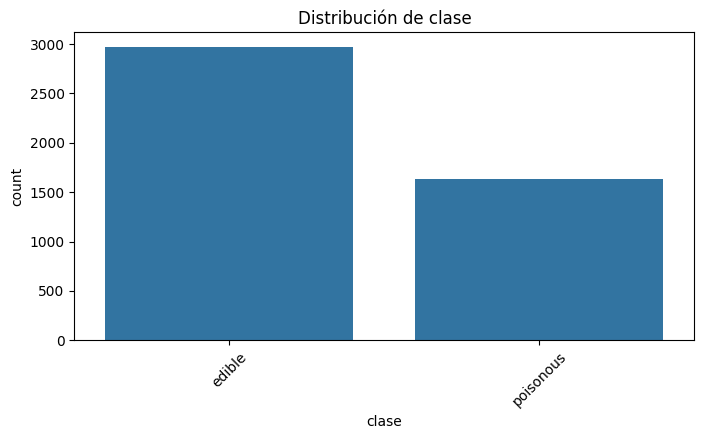

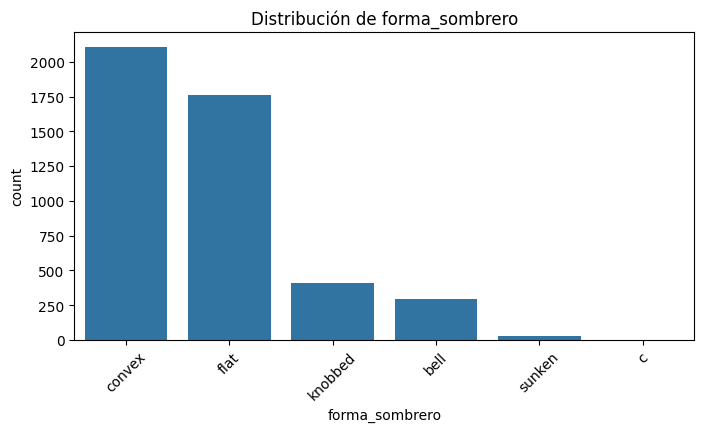

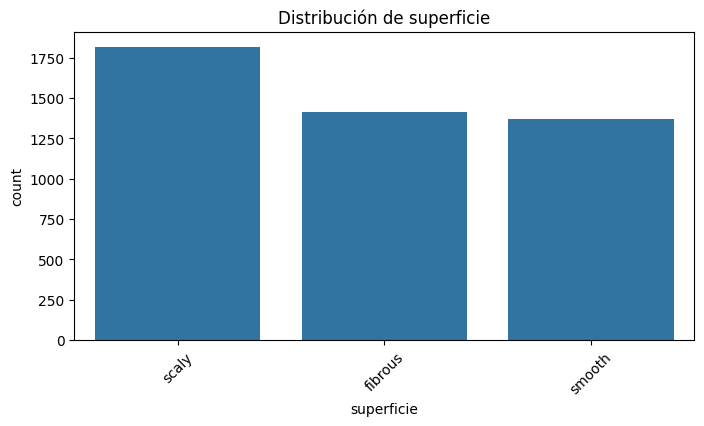

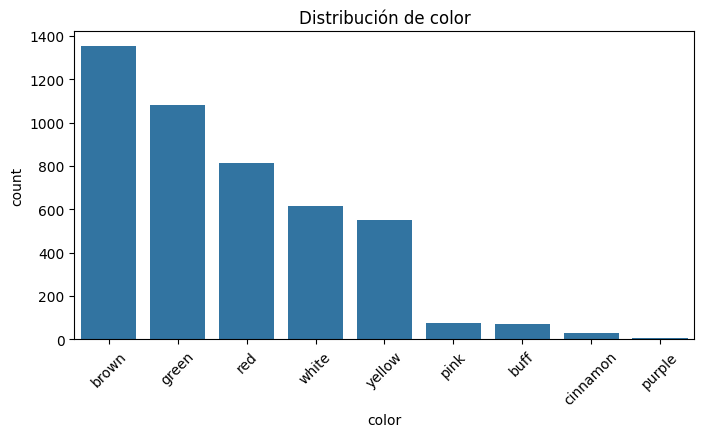

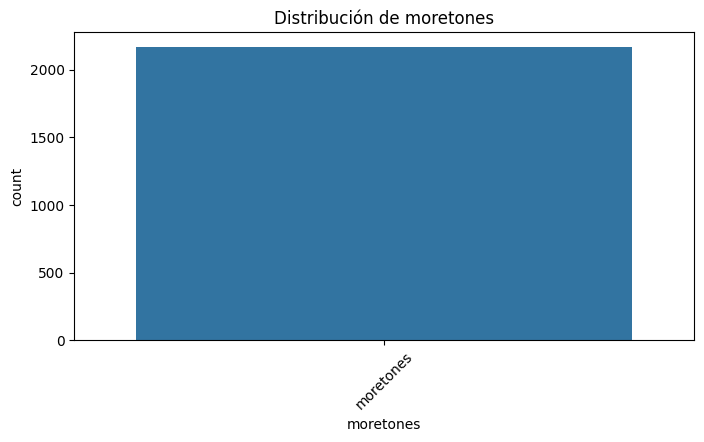

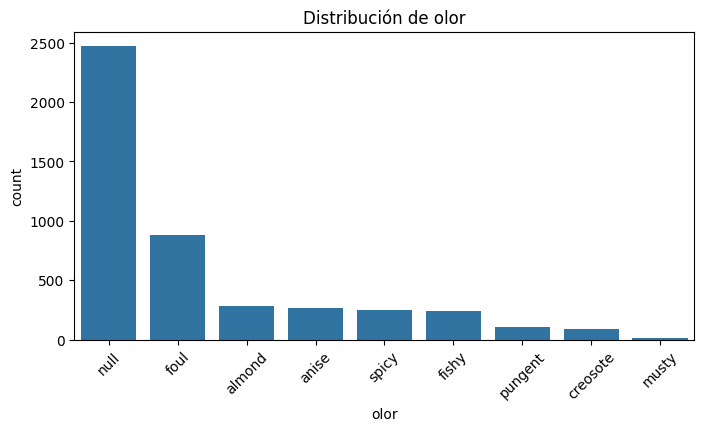

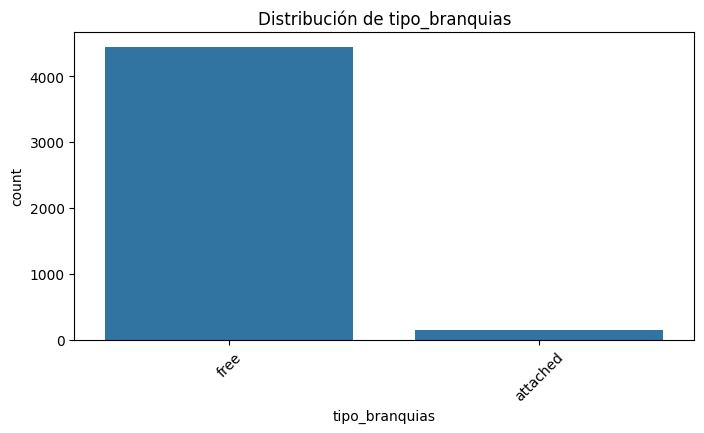

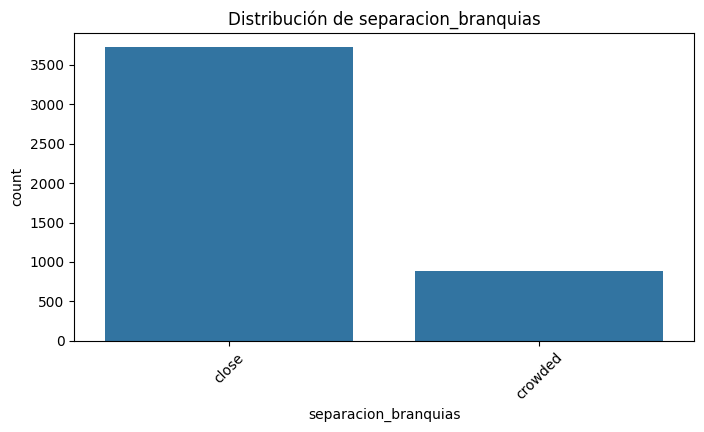

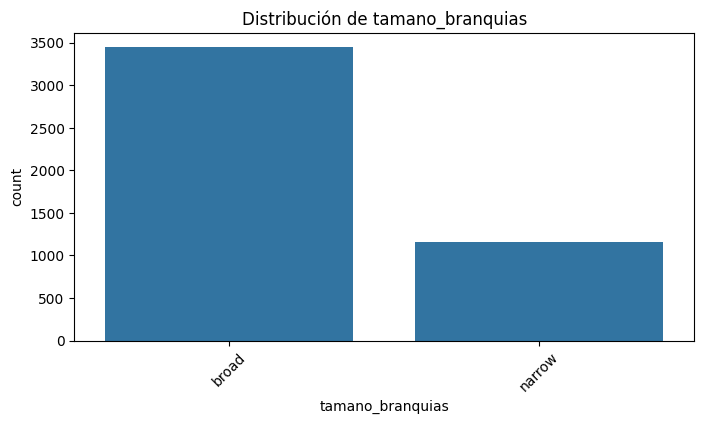

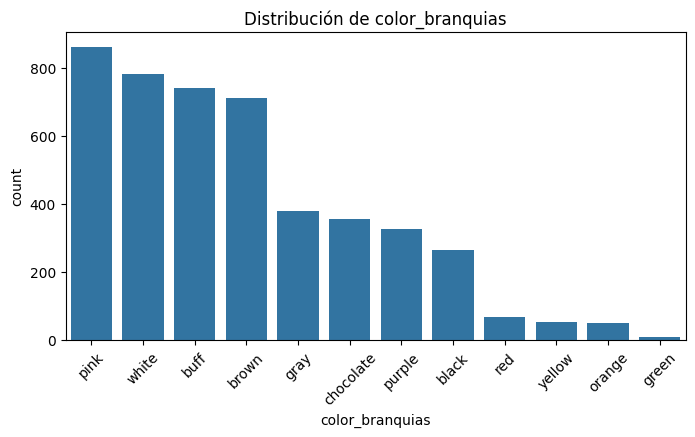

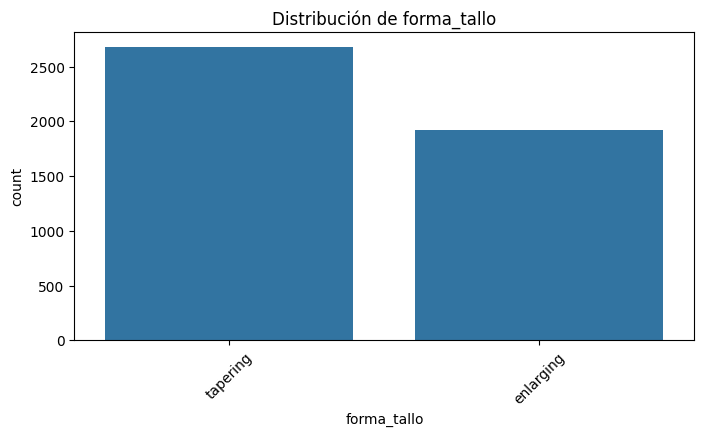

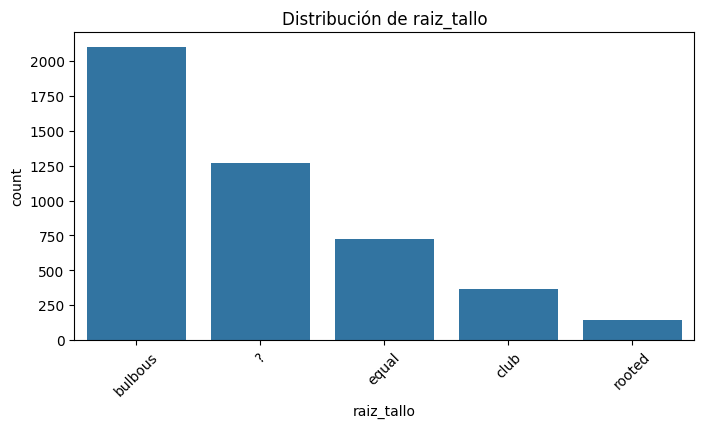

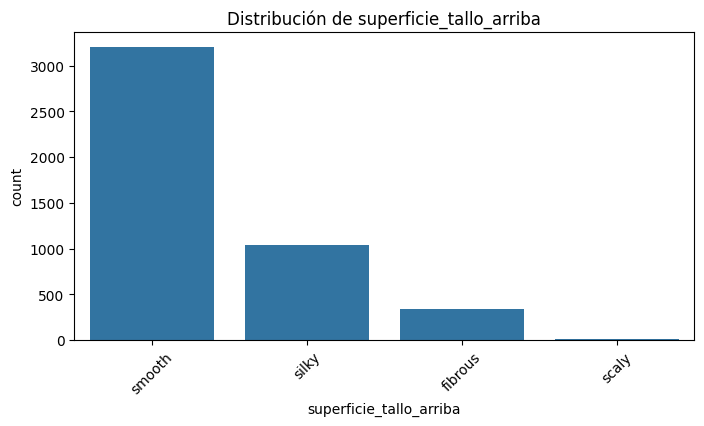

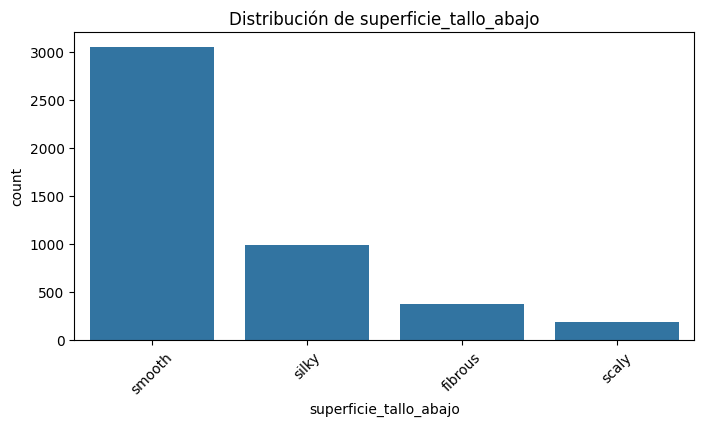

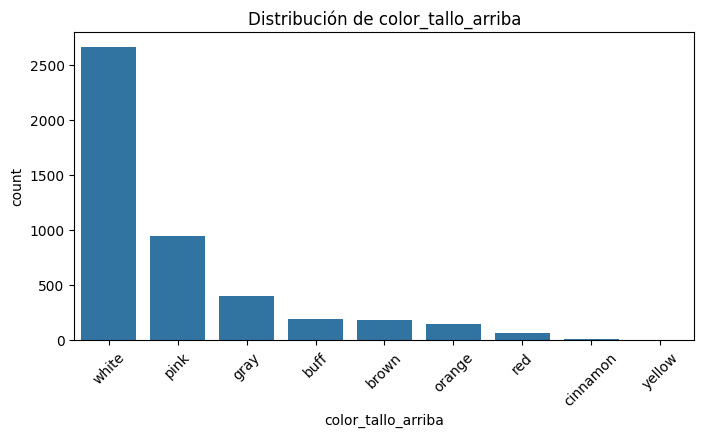

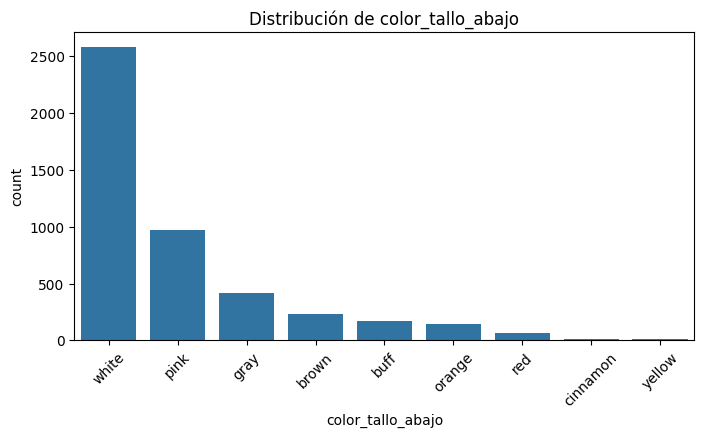

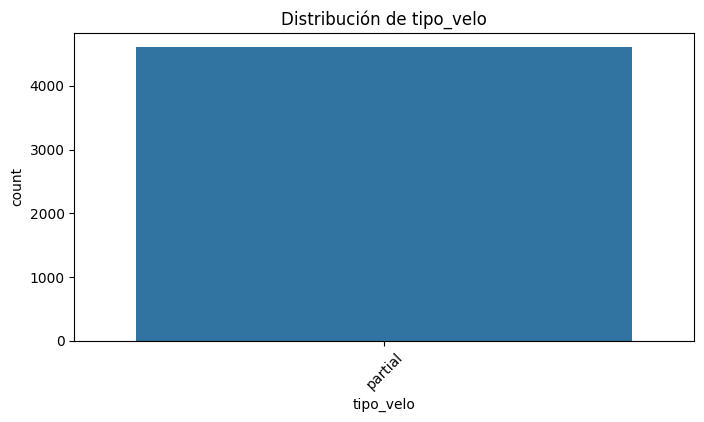

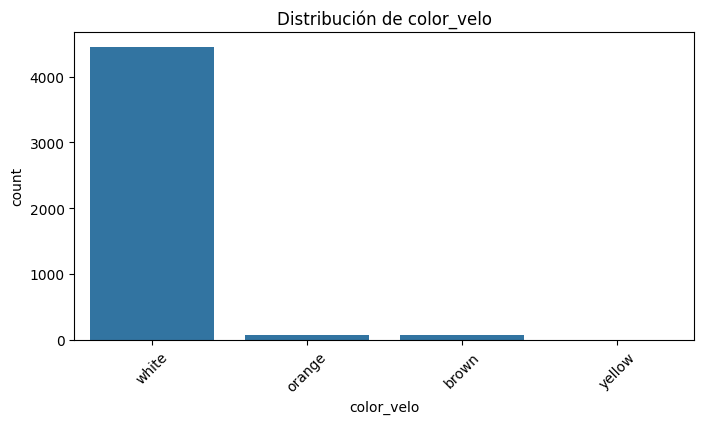

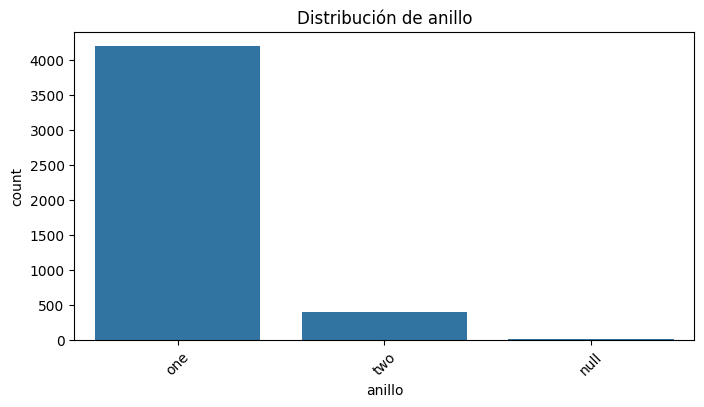

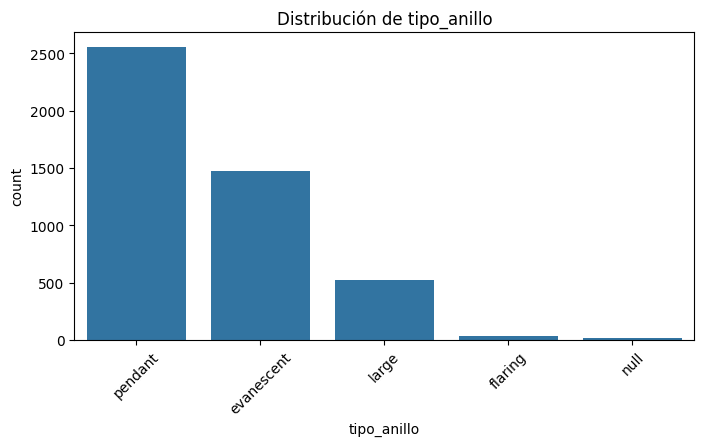

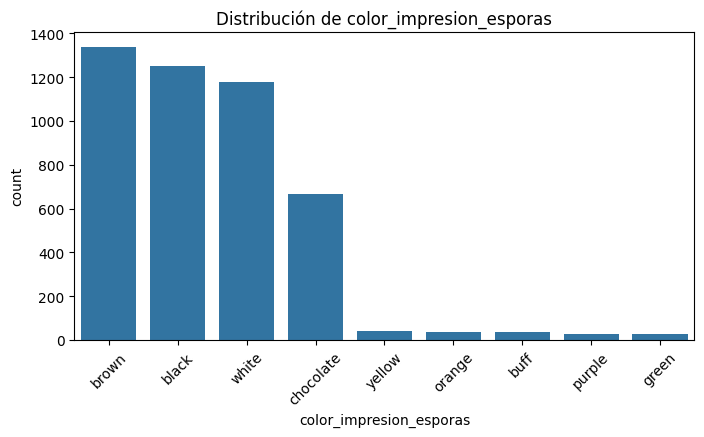

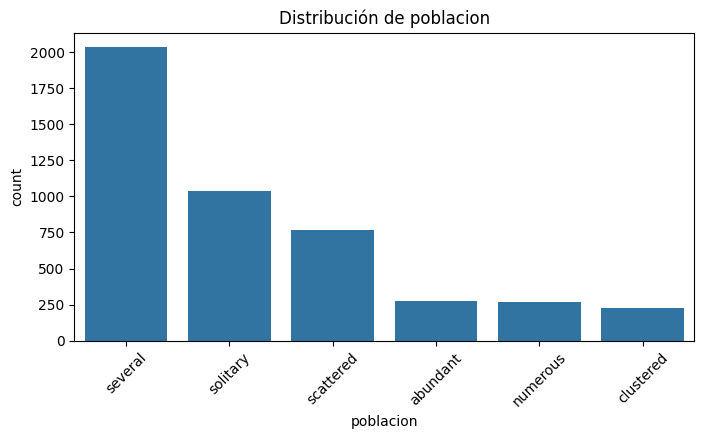

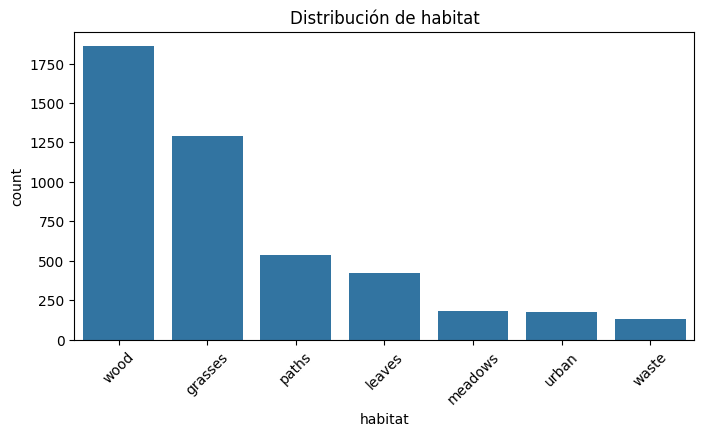

In [28]:
for col in df_0.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df_0[col], order=df_0[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribución de {col}')
    plt.show()


Existe una matriz de correlación para variables categóricas, usando el coeficiente Cramer, que mide la relación entre cada dos de ellas. 

/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_50225/2313570967.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_50225/2313570967.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_50225/2313570967.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_50225/2313570967.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_50225/2313570967.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_50225/2313570967.py:10: RuntimeWarni

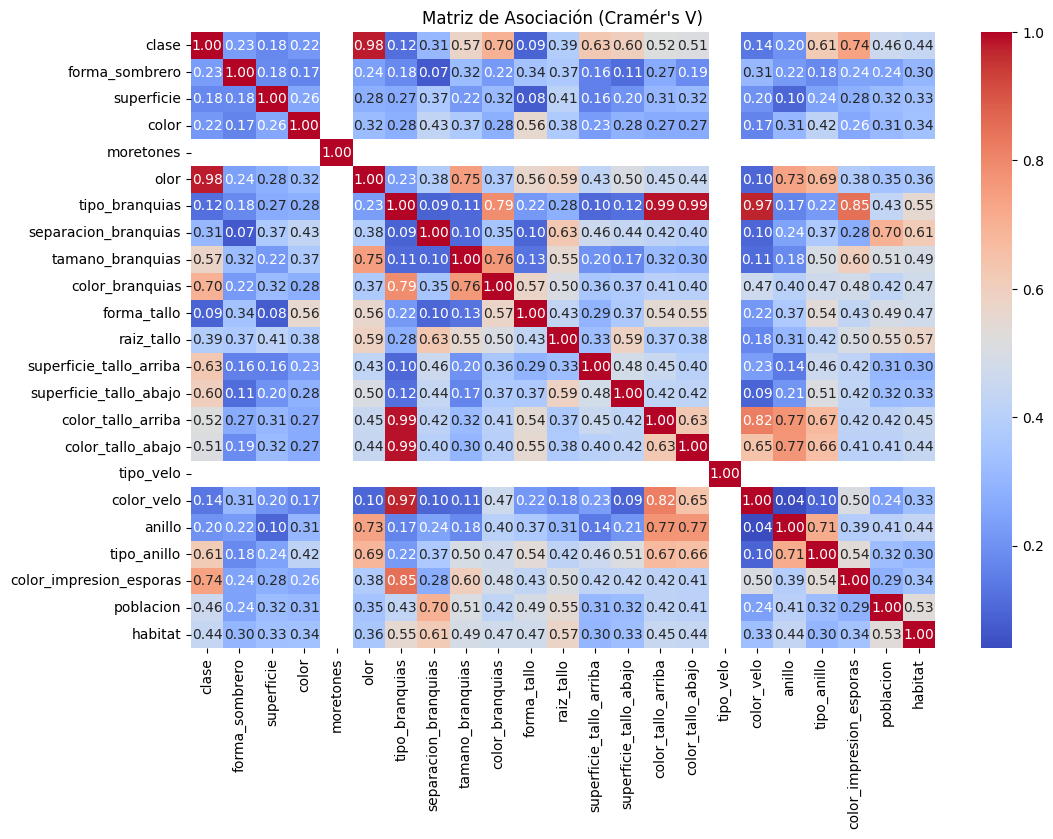

In [29]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

corr_matrix = pd.DataFrame(index=df_0.columns, columns=df_0.columns)

for col1 in df_0.columns:
    for col2 in df_0.columns:
        if col1 != col2:
            corr_matrix.loc[col1, col2] = cramers_v(df_0[col1], df_0[col2])
        else:
            corr_matrix.loc[col1, col2] = 1  # Autocorrelación

corr_matrix = corr_matrix.astype(float)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Asociación (Cramér's V)")
plt.show()


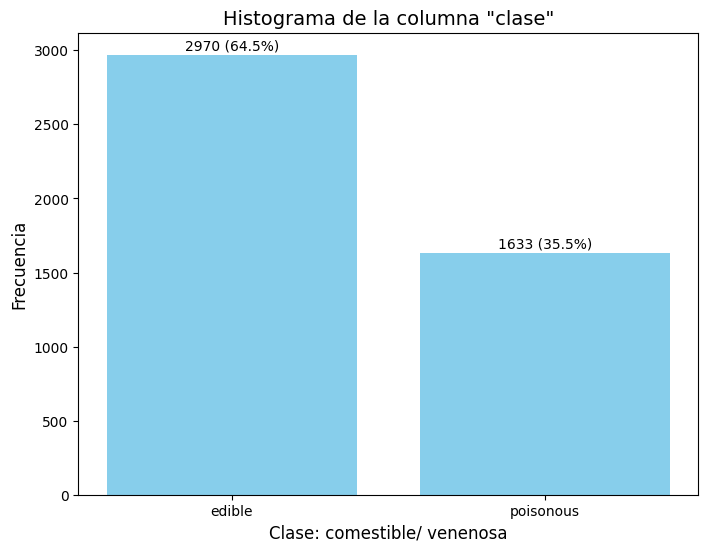

In [30]:
import matplotlib.pyplot as plt

# Contamos la frecuencia de los valores en la columna 'clase'
frecuencia_clase = df_0['clase'].value_counts()

# Calculamos el porcentaje de cada clase con respecto al total
porcentaje_clase = (frecuencia_clase / len(df_0)) * 100

# Crear el histograma
plt.figure(figsize=(8, 6))
bars = plt.bar(frecuencia_clase.index, frecuencia_clase.values, color='skyblue')

# Agregar títulos y etiquetas
plt.title('Histograma de la columna "clase"', fontsize=14)
plt.xlabel('Clase: comestible/ venenosa', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar el número total y porcentaje dentro de cada barra
for bar, count, percentage in zip(bars, frecuencia_clase.values, porcentaje_clase):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, 
             f'{count} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=10)

# Mostrar la gráfica
plt.show()


- Se trata de un problema de clasificación binaria.
- Vamos a trabajar con modelos supervisados, dado que conocemos la target a predecir, pero nos apoyaremos antes en modelos no-supervisados para clusterizar grupos con características similares, que nos puedan ayudar. 
- Observo un desbalance importante en la target a predecir, lo cual habremos de considerar y cuidar.

## 3. Preprocesamiento de Datos Inicial

In [31]:
# Detectar filas duplicadas
duplicados = df_0.duplicated()

# Ver si hay al menos una fila duplicada
if duplicados.any():
    print("Hay filas duplicadas en df_0")
else:
    print("No hay filas duplicadas en df_0")


No hay filas duplicadas en df_0


No hay duplicados, no hay valores faltantes. Voy a convertir todos mis valores a numéricos

### Conversión numerica (opción MultiLaberBinarizer)

In [32]:
# función conversión a numerícos (ayuda Claude)
def convert_to_numeric(df):
    """
    Convierte todas las columnas categóricas a numéricas usando MultiLabelBinarizer
    manejando adecuadamente los valores nulos
    Args:
        df: DataFrame original con columnas tipo 'object'
    Returns:
        DataFrame con todas las columnas convertidas a numéricas
    """
    # Crear una copia del DataFrame
    df_numeric = df.copy()
    
    # Para cada columna en el DataFrame
    for column in df_numeric.columns:
        # Reemplazar valores nulos con 'missing'
        df_numeric[column] = df_numeric[column].fillna('missing')
        
        # Convertir cada valor a una lista para MultiLabelBinarizer
        values = [[val] for val in df_numeric[column]]
        
        # Crear y ajustar el MultiLabelBinarizer
        mlb = MultiLabelBinarizer()
        # Transformar la columna
        encoded = mlb.fit_transform(values)
        
        # Crear nombres para las nuevas columnas
        new_columns = [f"{column}_{class_name}" for class_name in mlb.classes_]
        
        # Convertir a DataFrame
        encoded_df = pd.DataFrame(encoded, columns=new_columns, index=df.index)
        
        # Eliminar la columna original y añadir las nuevas
        df_numeric = df_numeric.drop(column, axis=1)
        df_numeric = pd.concat([df_numeric, encoded_df], axis=1)
    
    return df_numeric

In [33]:
df_numeric = convert_to_numeric(df_0)
df_numeric

,clase_edible,clase_poisonous,forma_sombrero_bell,forma_sombrero_c,forma_sombrero_convex,forma_sombrero_flat,forma_sombrero_knobbed,forma_sombrero_sunken,superficie_fibrous,superficie_scaly,...,poblacion_scattered,poblacion_several,poblacion_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_wood
ID,,,,,,,,,,,,,,,,,,,,,
367,1,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
5123,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2864,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4674,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1210,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
5591,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2053,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


Antes de aceptar lo anterior, voy a hacer una conversión numérica algo más cuidadosa, conviertiendo algunas columnas en numero ordinal para tener un conjunto de datos más compacto y adecuado. Después voy a ver eliminar algunas columnas de valor 'nul' o 'None', que no aportan información sobre dicha observación (seta).

### Conversión numérica2 más refinada (OrdinalEncoder +MLB)

In [74]:
def convert_to_numeric_better(df):
    df_numeric2 = df.copy()  # Copia para no modificar el original
    
    
    # Para las columnas específicas, usamos OrdinalEncoder
    encoder_anillo = OrdinalEncoder(categories=[['null', 'one', 'two']])
    
    # Agregar las categorías que ya existen en los datos
    encoder_poblacion = OrdinalEncoder(categories=[['solitary', 'scattered', 'several', 'clustered', 'numerous', 'abundant']])
    
    # Convertir 'anillo' con OrdinalEncoder
    df_numeric2['anillo'] = encoder_anillo.fit_transform(df_numeric2[['anillo']])
    
    # Convertir 'población' con OrdinalEncoder
    df_numeric2['poblacion'] = encoder_poblacion.fit_transform(df_numeric2[['poblacion']])
    
    # Para el resto de las columnas, usamos MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    for column in df_numeric2.columns:
        if column not in ['anillo', 'poblacion']:  # Evitar las columnas que ya hemos procesado
            # Convertimos a lista de etiquetas
            df_numeric2[column] = df_numeric2[column].apply(lambda x: [x] if isinstance(x, str) else [])

            # Aplicamos el MultiLabelBinarizer
            binarized = mlb.fit_transform(df_numeric2[column])
            labels = mlb.classes_
            
            # Creamos nuevas columnas para las etiquetas
            for idx, label in enumerate(labels):
                df_numeric2[f'{column}_{label}'] = binarized[:, idx]
            
            # Eliminamos la columna original
            df_numeric2.drop(columns=[column], inplace=True)

    # Eliminamos las columnas cuyo nombre contenga 'null', 'None' o '?'
    columns_to_drop = [col for col in df_numeric2.columns if 'null' in col or 'None' in col or '?' in col]
    df_numeric2.drop(columns=columns_to_drop, inplace=True)
    
    return df_numeric2


In [35]:
df_numeric2 = convert_to_numeric_better (df_0)
df_numeric2.head()

/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_50225/2184919210.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_numeric2[f'{column}_{label}'] = binarized[:, idx]
/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_50225/2184919210.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_numeric2[f'{column}_{label}'] = binarized[:, idx]
/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_50225/2184919210.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of call

,anillo,poblacion,clase_edible,clase_poisonous,forma_sombrero_bell,forma_sombrero_c,forma_sombrero_convex,forma_sombrero_flat,forma_sombrero_knobbed,forma_sombrero_sunken,...,color_impresion_esporas_purple,color_impresion_esporas_white,color_impresion_esporas_yellow,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_wood
ID,,,,,,,,,,,,,,,,,,,,,
367,1.0,1.0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5123,1.0,2.0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2864,1.0,2.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4674,1.0,1.0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1210,1.0,5.0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Resultado conversión numérica2

In [36]:
columnas = df_numeric2.columns.tolist()
columnas

['anillo',
 'poblacion',
 'clase_edible',
 'clase_poisonous',
 'forma_sombrero_bell',
 'forma_sombrero_c',
 'forma_sombrero_convex',
 'forma_sombrero_flat',
 'forma_sombrero_knobbed',
 'forma_sombrero_sunken',
 'superficie_fibrous',
 'superficie_scaly',
 'superficie_smooth',
 'color_brown',
 'color_buff',
 'color_cinnamon',
 'color_green',
 'color_pink',
 'color_purple',
 'color_red',
 'color_white',
 'color_yellow',
 'moretones_moretones',
 'olor_almond',
 'olor_anise',
 'olor_creosote',
 'olor_fishy',
 'olor_foul',
 'olor_musty',
 'olor_pungent',
 'olor_spicy',
 'tipo_branquias_attached',
 'tipo_branquias_free',
 'separacion_branquias_close',
 'separacion_branquias_crowded',
 'tamano_branquias_broad',
 'tamano_branquias_narrow',
 'color_branquias_black',
 'color_branquias_brown',
 'color_branquias_buff',
 'color_branquias_chocolate',
 'color_branquias_gray',
 'color_branquias_green',
 'color_branquias_orange',
 'color_branquias_pink',
 'color_branquias_purple',
 'color_branquias_red'

Voy a hacer un ajuste en la target, de acuerdo a lo solicitado en la Competición de Kaggle. 


In [109]:
def ajuste_target(df):
    """
    Elimina la columna 'clase_edible' y renombra 'clase_poisonous' a 'death'
    
    Args:
        df: DataFrame con las columnas 'clase_edible' y 'clase_poisonous'
    
    Returns:
        DataFrame sin 'clase_edible' y con 'clase_poisonous' renombrada a 'death'
    """
    # Crear una copia del DataFrame
    df_ML = df.copy()
    
    # Eliminar la columna 'clase_edible' o 'class_edible'
    if 'clase_edible' in df_ML.columns:
        df_ML = df_ML.drop('clase_edible', axis=1)
    if 'class_edible' in df_ML.columns:
        df_ML = df_ML.drop('class_edible', axis=1)
        
    # Renombrar 'clase_poisonous' o 'class_poisonous' a 'death'
    if 'clase_poisonous'  in df_ML.columns:
        df_ML = df_ML.rename(columns={'clase_poisonous': 'death'})
    if 'class_poisonous' in df_ML.columns:
        df_ML = df_ML.rename(columns={'class_poisonous': 'death'})
        
    # Utilizar pd.concat para colocar la columna 'death' en la primera posición
    if 'death' in df_ML.columns:
        death_column = df_ML[['death']]
        df_ML = df_ML.drop('death', axis=1)
        df_ML = pd.concat([death_column, df_ML], axis=1)
    
    return df_ML

In [38]:
ajuste_target(df_numeric2)

,death,anillo,poblacion,forma_sombrero_bell,forma_sombrero_c,forma_sombrero_convex,forma_sombrero_flat,forma_sombrero_knobbed,forma_sombrero_sunken,superficie_fibrous,...,color_impresion_esporas_purple,color_impresion_esporas_white,color_impresion_esporas_yellow,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_wood
ID,,,,,,,,,,,,,,,,,,,,,
367,0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5123,1,1.0,2.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2864,0,1.0,2.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4674,1,1.0,1.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1210,0,1.0,5.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0,1.0,2.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5591,1,1.0,2.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2053,0,1.0,0.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [39]:
df_final= ajuste_target(df_numeric2)

Aquí obtengo el dataframe limpio y con todos sus valores numéricos.

In [40]:
df_final.head(3)

,death,anillo,poblacion,forma_sombrero_bell,forma_sombrero_c,forma_sombrero_convex,forma_sombrero_flat,forma_sombrero_knobbed,forma_sombrero_sunken,superficie_fibrous,...,color_impresion_esporas_purple,color_impresion_esporas_white,color_impresion_esporas_yellow,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_wood
ID,,,,,,,,,,,,,,,,,,,,,
367,0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5123,1,1.0,2.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2864,0,1.0,2.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [41]:
# Guardar en formato JSON optimizado
df_final.to_json('data/processed/setas_Ronald_ML_Kaggle.json', 
                 orient='records',  # Cada fila como objeto JSON independiente
                 indent=4       # Formato legible #
            )

## 4. Feature Engineering


Voy a evaluar la importancia de cada variable en la predicción, para poder realizar una reducción de dimensionalidad si así puedo concluirlo. 

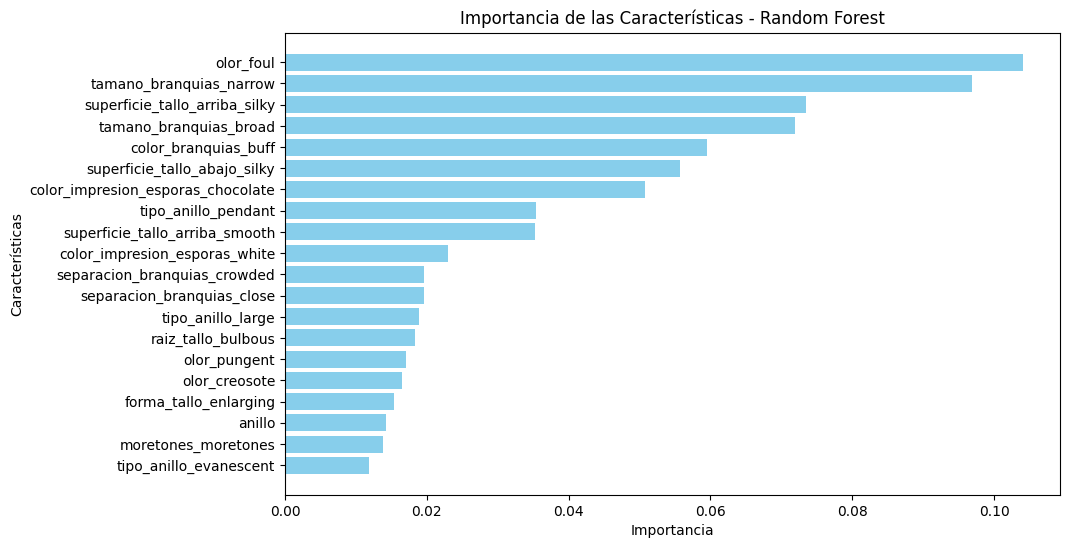

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Definir variables predictoras (X) y la variable objetivo (y)
X = df_final.drop(columns=['death'])  # Todas las columnas excepto 'death'
y = df_final['death']  # Target

# Dividir en conjunto de entrenamiento y prueba (opcional, pero recomendado)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obtener la importancia de las características
importancias = model.feature_importances_

# Crear un DataFrame con las importancias y las columnas
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importancias})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar las 20 características más importantes
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características - Random Forest')
plt.gca().invert_yaxis()  # Para que la más importante esté arriba
plt.show()



In [43]:
# Mostrar las 20 características más importantes en tabla
feature_importance_df.head(20)

,Feature,Importance
25,olor_foul,0.104107
34,tamano_branquias_narrow,0.096881
55,superficie_tallo_arriba_silky,0.073544
33,tamano_branquias_broad,0.071967
37,color_branquias_buff,0.059510
59,superficie_tallo_abajo_silky,0.055736
91,color_impresion_esporas_chocolate,0.050772
87,tipo_anillo_pendant,0.035453
56,superficie_tallo_arriba_smooth,0.035262
95,color_impresion_esporas_white,0.022960


In [44]:
df_final.head(3)

,death,anillo,poblacion,forma_sombrero_bell,forma_sombrero_c,forma_sombrero_convex,forma_sombrero_flat,forma_sombrero_knobbed,forma_sombrero_sunken,superficie_fibrous,...,color_impresion_esporas_purple,color_impresion_esporas_white,color_impresion_esporas_yellow,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_wood
ID,,,,,,,,,,,,,,,,,,,,,
367,0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5123,1,1.0,2.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2864,0,1.0,2.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


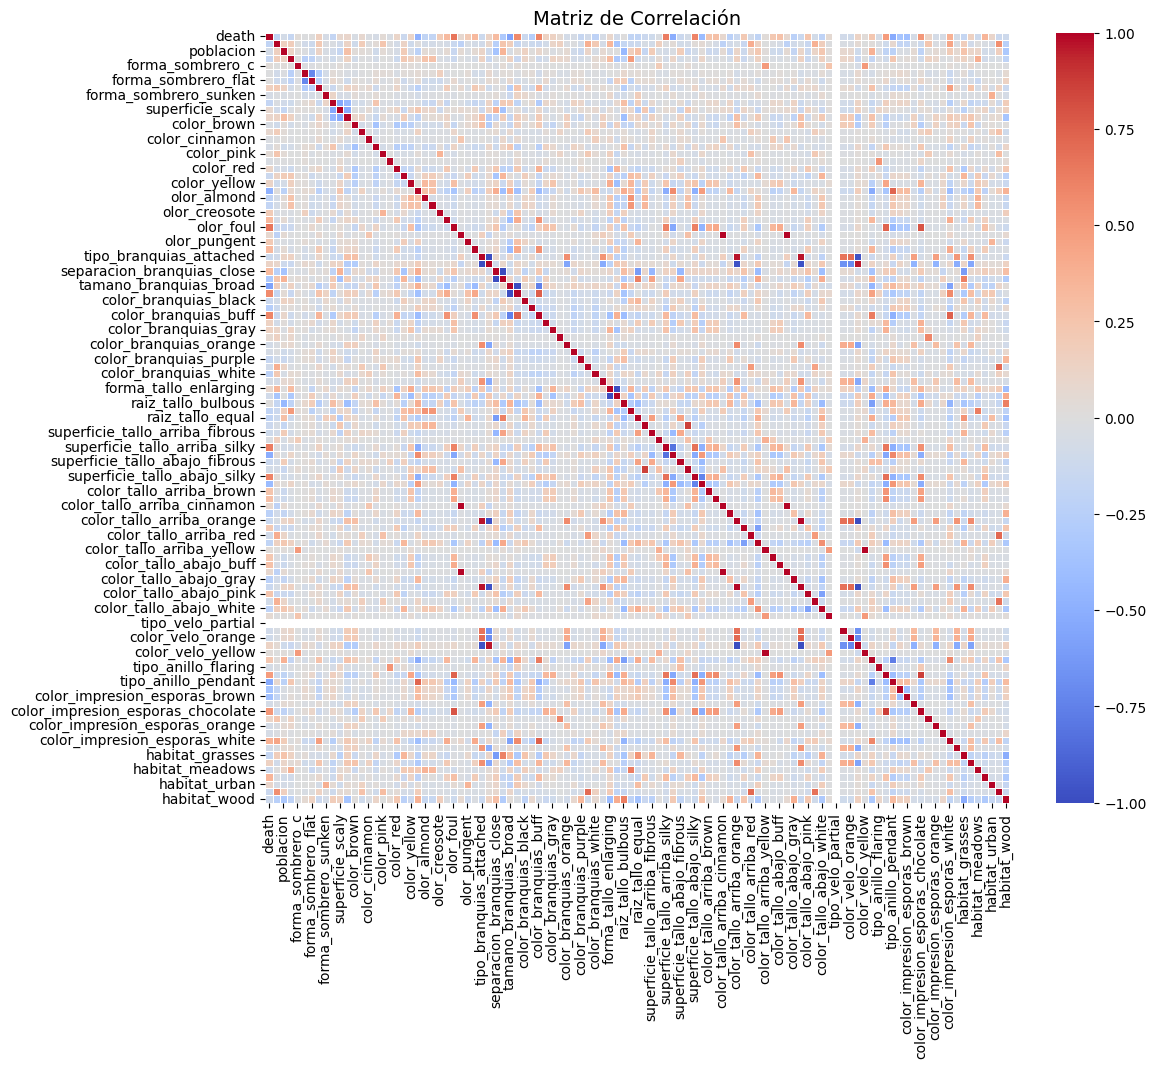

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df es tu DataFrame con las columnas numéricas
plt.figure(figsize=(12, 10))

# Calcular la matriz de correlación
corr_matrix = df_final.corr()

# Crear un mapa de calor con seaborn
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

# Agregar título
plt.title("Matriz de Correlación", fontsize=14)
plt.show()


Aquí no hay quien vea (casi) nada, así que recurro a eliminar columnas fijando umbrales. 
Primeramente, eliminamos aquellas columnas que tienen alta correlación entre sí. Fijamos 80%.

In [46]:
corr_matrix = df_final.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar columnas con alta correlación (por ejemplo, >0.8)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

df_reducido1 = df_final.drop(columns=to_drop)
df_reducido1.head(1)

,death,anillo,poblacion,forma_sombrero_bell,forma_sombrero_c,forma_sombrero_convex,forma_sombrero_flat,forma_sombrero_knobbed,forma_sombrero_sunken,superficie_fibrous,...,color_impresion_esporas_purple,color_impresion_esporas_white,color_impresion_esporas_yellow,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_wood
ID,,,,,,,,,,,,,,,,,,,,,
367,0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Llegamos a 92 columnas. Ahora eliminamos aquellas columnas que NO tienen correlación mínima con la variable a predecir, target. Fijamos 10%.

In [47]:
correlaciones = df_reducido1.corr()["death"].abs().sort_values(ascending=False)
top_features = correlaciones[correlaciones > 0.1].index  # Se pueden ajustar los valores
df_reducido2 = df_reducido1[top_features]

df_reducido2.head(1)

,death,olor_foul,superficie_tallo_arriba_silky,superficie_tallo_abajo_silky,color_branquias_buff,tamano_branquias_broad,tipo_anillo_pendant,tipo_anillo_large,moretones_moretones,superficie_tallo_abajo_smooth,...,habitat_waste,superficie_tallo_abajo_fibrous,color_white,tipo_branquias_attached,habitat_meadows,color_yellow,habitat_wood,superficie_tallo_arriba_fibrous,color_red,color_impresion_esporas_green
ID,,,,,,,,,,,,,,,,,,,,,
367,0,0,0,0,0,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0


Llegamos a 57 columnas. Tercer paso, voy a explorar si Recursive Feature Elimination (RFE), haciendo una selección de columnas funciona mejor.

In [48]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = df_reducido2.drop(columns=["death"])
y = df_reducido2["death"]

model = RandomForestClassifier()
selector = RFE(model, n_features_to_select=30)  # Ajusto aproximadamente a la mitad de las columnas que tengo
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
df_reducido3 = df_reducido2[selected_features.insert(0, "death")]

df_reducido3.head(1)

,death,olor_foul,superficie_tallo_arriba_silky,superficie_tallo_abajo_silky,color_branquias_buff,tamano_branquias_broad,tipo_anillo_pendant,tipo_anillo_large,moretones_moretones,superficie_tallo_abajo_smooth,...,color_tallo_arriba_white,anillo,olor_creosote,raiz_tallo_equal,superficie_fibrous,habitat_grasses,superficie_tallo_abajo_fibrous,habitat_wood,superficie_tallo_arriba_fibrous,color_impresion_esporas_green
ID,,,,,,,,,,,,,,,,,,,,,
367,0,0,0,0,0,1,1,0,1,1,...,1,1.0,0,0,0,1,0,0,0,0


## Aplicación aprendizaje no supervisado: PCA
Debe realizarse al final (o dentro de) Feature Engineering. Como un camino en paralelo (no secuencial) a probar, en notebook duplicado.
En este caso está probado en el mismo notebook, pero se descarta y posteriormente se sigue con el conjunto de datos sin PCA.

En paralelo, dentro de FE, se prueba Modelos no supervisados, clusterización o PCA, para ver si mejora mi modelo. Si este empeora o no mejora sustancialmente, se desecha, y se sigue sin ello. Y si mejora, se incorpora. Debería realizarse en un notebook aparte, duplicándolo, y se continua con el notebook que proceda según lo anterior.  

Voy a probar a aplicar la técnica / herramienta de Principal Component Analysis, PCA de SKlearn, para estudiar si puedo reducir la complejidad, dimensiones, y evitar el sobreajuste.

In [49]:
df_final.head(2)

,death,anillo,poblacion,forma_sombrero_bell,forma_sombrero_c,forma_sombrero_convex,forma_sombrero_flat,forma_sombrero_knobbed,forma_sombrero_sunken,superficie_fibrous,...,color_impresion_esporas_purple,color_impresion_esporas_white,color_impresion_esporas_yellow,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_wood
ID,,,,,,,,,,,,,,,,,,,,,
367,0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5123,1,1.0,2.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [50]:
from sklearn.feature_selection import VarianceThreshold

X = df_final.select_dtypes(include=['number'])  # Filtra solo columnas numéricas

selector = VarianceThreshold(threshold=0.0)  # Elimina columnas con varianza 0
X_filtered = selector.fit_transform(X)  # Aplica filtro

print("Forma antes de filtrar:", X.shape)
print("Forma después de filtrar:", X_filtered.shape)


Forma antes de filtrar: (4603, 105)
Forma después de filtrar: (4603, 104)


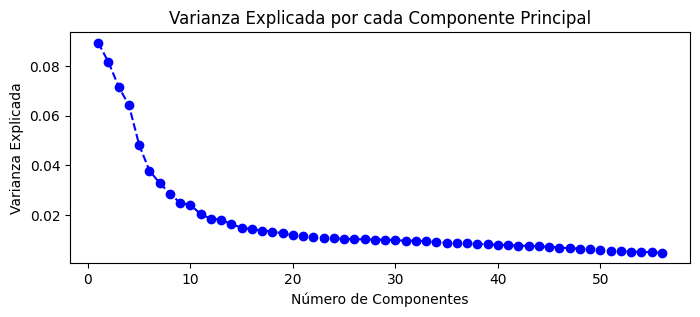

Dimensiones originales: 104
Dimensiones después de PCA: 56


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,death
ID,,,,,,,,,,,,,,,,,,,,,
367,-2.768872,-1.313836,-1.111470,2.626103,-3.966487,-2.277457,-1.373262,-0.454016,-1.483419,-1.950547,...,-0.090773,-2.136905,-0.508125,1.529239,-0.005193,-0.954563,1.244568,0.324966,-0.025455,0
5123,4.611455,1.649677,3.301732,-1.772247,-0.606960,-0.851531,-0.756482,-0.329906,-0.421975,-0.502734,...,-0.526289,0.408259,0.431892,0.600129,0.961671,1.063676,0.357770,-1.043436,0.071793,1
2864,-1.292784,-1.733734,-1.928182,-1.523494,1.559372,0.355139,-0.012001,-0.125374,0.591874,-0.511545,...,-0.133964,0.115756,0.177010,-0.093372,0.047745,-0.662618,0.199289,0.691327,-0.118206,0
4674,0.714485,-1.085953,0.061896,2.518374,2.055360,-0.221146,-0.136464,-0.207028,-0.332775,0.568235,...,-1.371805,-0.391279,0.089405,0.649656,-0.595294,-0.920746,1.261310,0.033659,0.146829,1
1210,-1.339541,-1.748469,4.808872,4.823138,3.338107,-0.419665,0.766210,-0.287598,-0.920417,-0.770695,...,0.059997,0.607018,0.268633,-0.867794,0.410146,-0.764754,1.029356,0.453557,0.274475,0


In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Asegurar que no incluimos la variable objetivo en PCA
X = df_final.drop(columns=["death"])  
y = df_final["death"]

# Normalizar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Aplicar PCA
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame y conservar los índices originales
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])], index=X.index)

# Agregar la variable objetivo sin NaN
df_pca["death"] = y

# Explicar cuánta varianza explica cada componente
explained_variance = pca.explained_variance_ratio_

# Graficar la varianza explicada por cada componente principal
plt.figure(figsize=(8, 3))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="--", color="b")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada")
plt.title("Varianza Explicada por cada Componente Principal")
plt.show()

# Mostrar el nuevo DataFrame reducido
print(f"Dimensiones originales: {X.shape[1]}")
print(f"Dimensiones después de PCA: {df_pca.shape[1] - 1}")  # -1 porque incluye "death"
df_pca.head()


Aplico mi baseline de trabajo al dataframe obtenido para ver los resultados. 


Evaluando modelo: Logistic Regression


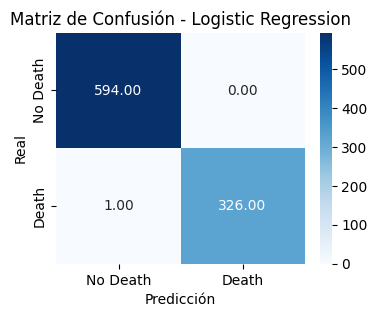


Evaluando modelo: KNN


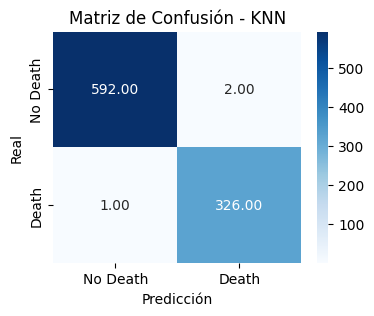


Evaluando modelo: SVM


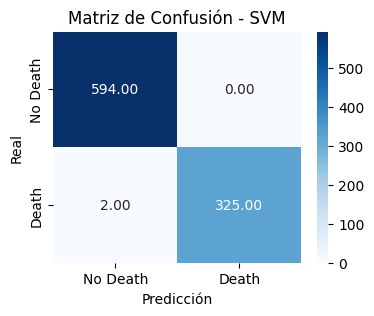


Evaluando modelo: Decision Tree


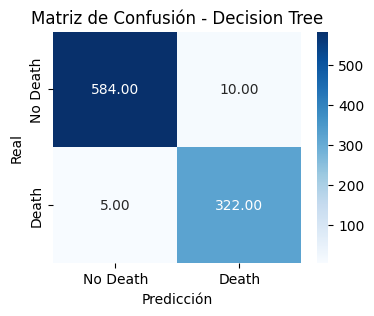


Evaluando modelo: Bagging Classifier


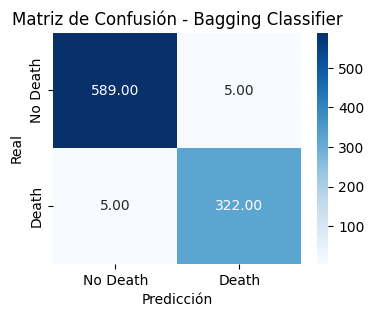


Evaluando modelo: Random Forest


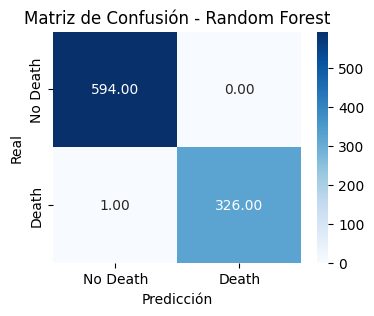

                Modelo  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.998914   1.000000  0.996942  0.998469
5        Random Forest  0.998914   1.000000  0.996942  0.998469
2                  SVM  0.997828   1.000000  0.993884  0.996933
1                  KNN  0.996743   0.993902  0.996942  0.995420
4   Bagging Classifier  0.989142   0.984709  0.984709  0.984709
3        Decision Tree  0.983713   0.969880  0.984709  0.977238


In [61]:
# df es el DataFrame con los datos, donde 'death' es la columna objetivo
df = df_pca

X = df.drop(columns=["death"])
y = df["death"]

resultados = evaluar_modelos(X, y)

# Guardar el nombre manualmente
nombre_df = "df_PCA"

# Imprimir el nombre del conjunto de datos
# print(f"Nombre del Conjunto de Datos: {nombre_df}")

print(resultados)

He probado a aplicar PCA sobre el dataframe original, sin eliminar ninguna columna fruto de la correlación o RFE, y llego a 56 columnas con valores F1 similares. Al aplicar PCA pierdo la explicabilidad e interpretabilidad de los datos, sin mejoras notables, así que lo descarto.

## 5. Preparación de Datos

In [63]:
# División en entrenamiento y validación (80%-20%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 6. Selección de los modelos de trabajo

_________________________________
### Baseline de trabajo
Realizo una función pack de modelos para evaluar cuál funciona mejor. 

In [64]:
#librerías para la función
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [65]:
# Función evaluar_modelos,opcional graficar matrices de confusión
def evaluar_modelos(X, y, mostrar_cm=True):
    """
    Evalúa varios modelos de clasificación binaria con validación cruzada
    y muestra su matriz de confusión promedio.

    Parámetros:
        X: DataFrame con las características
        y: Serie con la variable objetivo ('death')
        mostrar_cm: Boolean, si True muestra las matrices de confusión
    Retorna:
        Un DataFrame con métricas de rendimiento de cada modelo.
    """
    # División en entrenamiento y validación (80%-20%)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    modelos = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "KNN": KNeighborsClassifier(),
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Bagging Classifier": BaggingClassifier(),
        "Random Forest": RandomForestClassifier()
    }
    
    resultados = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for nombre, modelo in modelos.items():
        print(f"\nEvaluando modelo: {nombre}")

        # Entrenar el modelo con los datos de entrenamiento
        modelo.fit(X_train, y_train)
        
        # Validación cruzada con predicciones
        y_pred = cross_val_predict(modelo, X_valid, y_valid, cv=skf)

        # Calcular matriz de confusión
        cm = confusion_matrix(y_valid, y_pred)
        
        # Normalizar matriz de confusión
        cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

        # Reporte de clasificación
        reporte = classification_report(y_valid, y_pred, output_dict=True)
        accuracy = reporte["accuracy"]
        precision = reporte["1"]["precision"]
        recall = reporte["1"]["recall"]
        f1_score = reporte["1"]["f1-score"]

        resultados.append({
            "Modelo": nombre,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1_score
        })

        # Graficar matriz de confusión solo si se solicita
        if mostrar_cm:
            plt.figure(figsize=(4, 3))
            sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["No Death", "Death"], yticklabels=["No Death", "Death"])
            plt.xlabel("Predicción")
            plt.ylabel("Real")
            plt.title(f"Matriz de Confusión - {nombre}")
            plt.show()

    # Convertir resultados en DataFrame
    df_resultados = pd.DataFrame(resultados).sort_values(by="F1 Score", ascending=False)
    return df_resultados



Evaluando modelo: Logistic Regression


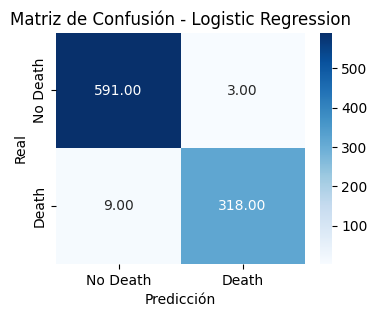


Evaluando modelo: KNN


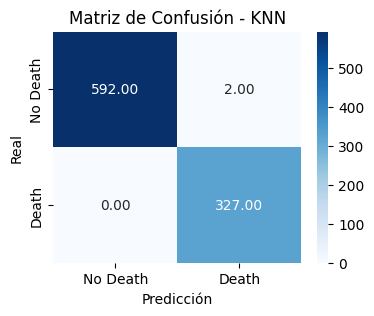


Evaluando modelo: SVM


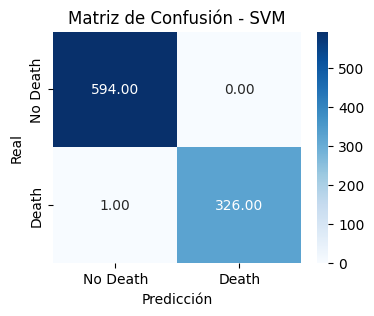


Evaluando modelo: Decision Tree


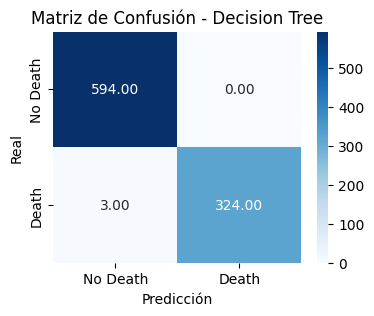


Evaluando modelo: Bagging Classifier


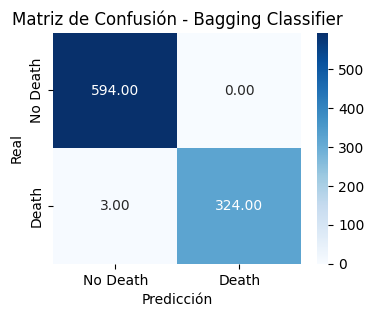


Evaluando modelo: Random Forest


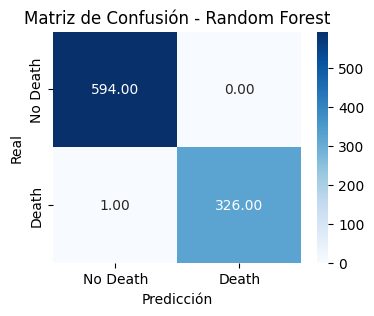

Nombre del Conjunto de Datos: df_reducido3
                Modelo  Accuracy  Precision    Recall  F1 Score
5        Random Forest  0.998914   1.000000  0.996942  0.998469
2                  SVM  0.998914   1.000000  0.996942  0.998469
1                  KNN  0.997828   0.993921  1.000000  0.996951
3        Decision Tree  0.996743   1.000000  0.990826  0.995392
4   Bagging Classifier  0.996743   1.000000  0.990826  0.995392
0  Logistic Regression  0.986971   0.990654  0.972477  0.981481


In [66]:
# df es el DataFrame con los datos, donde 'death' es la columna objetivo
df = df_reducido3

X = df.drop(columns=["death"])
y = df["death"]

resultados = evaluar_modelos(X, y)

# Guardar el nombre manualmente
nombre_df = "df_reducido3"

# Imprimir el nombre del conjunto de datos
print(f"Nombre del Conjunto de Datos: {nombre_df}")

print(resultados)

In [67]:
# Crear un diccionario para almacenar todos los resultados
todos_resultados = {}

# Para cada DataFrame que quieras evaluar:
dataframes = {
    "df_final": df_final,
    "df_reducido1": df_reducido1,
    "df_reducido2": df_reducido2,
    "df_reducido3": df_reducido3,
    # Añade aquí todos los DataFrames que quieras evaluar
}

# Iterar sobre cada DataFrame y guardar sus resultados
for nombre_df, df in dataframes.items():
    print(f"\nNombre del Conjunto de Datos: {nombre_df}")
    X = df.drop(columns=["death"])
    y = df["death"]
    resultados = evaluar_modelos(X, y, mostrar_cm =False)
    todos_resultados[nombre_df] = resultados
    
    # Si quieres imprimir los resultados individuales durante la ejecución
    print(f"\nNombre del Conjunto de Datos: {nombre_df}")
    print(resultados)

# Al final, imprimir todos los resultados juntos para comparar
print("\n===== COMPARACIÓN DE TODOS LOS RESULTADOS =====")
for nombre_df, resultados in todos_resultados.items():
    print(f"\nResultados para {nombre_df}:")
    print(resultados)


Nombre del Conjunto de Datos: df_final

Evaluando modelo: Logistic Regression

Evaluando modelo: KNN

Evaluando modelo: SVM

Evaluando modelo: Decision Tree

Evaluando modelo: Bagging Classifier

Evaluando modelo: Random Forest

Nombre del Conjunto de Datos: df_final
                Modelo  Accuracy  Precision    Recall  F1 Score
1                  KNN  0.997828   0.996942  0.996942  0.996942
5        Random Forest  0.997828   1.000000  0.993884  0.996933
4   Bagging Classifier  0.997828   1.000000  0.993884  0.996933
3        Decision Tree  0.996743   0.996933  0.993884  0.995406
0  Logistic Regression  0.992400   0.990798  0.987768  0.989280
2                  SVM  0.992400   0.990798  0.987768  0.989280

Nombre del Conjunto de Datos: df_reducido1

Evaluando modelo: Logistic Regression

Evaluando modelo: KNN

Evaluando modelo: SVM

Evaluando modelo: Decision Tree

Evaluando modelo: Bagging Classifier

Evaluando modelo: Random Forest

Nombre del Conjunto de Datos: df_reducido1
      

### Selección de mejores modelos


El modelo que mejor predice y mejor Recall tiene, que es, en el fondo, lo que más nos interesa, es Random Forest. 

Por otro lado, veo que funciona mejor el conjunto de datos con todos los datos (df_final) que cuando empiezo a eliminar demasiadasa columnas. Solo observo que df_reducido3, en el modelo de SVM o RandomForest, me devuelven resultados idénticos.

Ahora me da valores distintos, pero en todo caso, con el conjunto de datos 'reducido3' y el modelo KNN, obtengo f1=1, perfecto,ummm sospechoso. Será el que aplique en mis datos test.



### Justificación razones de selección

Para igual desempeño, es preferible quedarse con el conjunto de datos más reducido, y con los dos modelos que mejor resultado obtengo, por parsimonia y coste computacional.
Los beneficios de la simplicidad son una mejor interpretabilidad, mejor generalización y eficiencia.

## 7. Optimización de Modelos Seleccionados

No he realizado optimización, dado que tras aplicar reducción de dimensionalidad con correlaciones, y eliminación mediante Recursive Feature Elimination (RFE), ya tengo resultados "perfectos".

## 7-8 Agrupación código aplicado a train para su aplicación a nuevos datos

_________________________________CONCLUSIÓN: MODELO ELEGIDO

Habiendo obtenido con el modelo reducido de columnas mediante matriz de correlaciones y 57 columnas, un valor 'perfecto' con el modelo vecinos cercanos KNN.Así pues, ahora acumulo el código para aplicar a 'test' y probar y subir a Kaggle.

In [68]:
import pandas as pd
import numpy as np

import sys
import os
import re

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, MultiLabelBinarizer

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
datos = pd.read_parquet('data/raw/train.snappy')

In [70]:
# extracción atributos mediante diccionario
def extraer_atributos(fila_n):
    """Extrae los atributos de una fila de descripción usando regex."""
    
    return {
    'ID': re.search(r'\*\*La observación\*\*(.*?) describe', fila_n).group(1).strip() if re.search(r'\*\*La observación\*\*(.*?) describe', fila_n) else None,
    'clase': re.search(r'\*\*clase\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*clase\*\*(.*?)\.', fila_n) else None,
    'forma_sombrero': re.search(r'\*\*forma de sombrero\*\* (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*forma de sombrero\*\* (.*?) ', fila_n) else None,
    'superficie': re.search(r'\*\*superficie\*\*(.*?) \*\*y', fila_n).group(1).strip() if re.search(r'\*\*superficie\*\*(.*?) \*\*y', fila_n) else None,
    'color': re.search(r'\*\*y un color\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y un color\*\*(.*?)\.', fila_n) else None,
    'moretones': re.search(r'\*\*Presenta\*\*(.*?) y', fila_n).group(1).strip() if re.search(r'\*\*Presenta\*\*(.*?) y', fila_n) else None,
    'olor': re.search(r'\*\*olor\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*olor\*\*(.*?)\.', fila_n) else None,
    'tipo_branquias': re.search(r'\*\*Las branquias son de tipo\*\*(.*?) con', fila_n).group(1).strip() if re.search(r'\*\*Las branquias son de tipo\*\*(.*?) con', fila_n) else None,
    'separacion_branquias': re.search(r'\*\*separación\*\*(.*?) \*\*y', fila_n).group(1).strip() if re.search(r'\*\*separación\*\*(.*?) \*\*y', fila_n) else None,
    'tamano_branquias': re.search(r'\*\*y un tamaño\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y un tamaño\*\*(.*?)\.', fila_n) else None,
    'color_branquias': re.search(r'\*\*El color de las branquias es\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*El color de las branquias es\*\*(.*?)\.', fila_n) else None,
    'forma_tallo': re.search(r'\*\*La forma del tallo\*\* (?:es) (.*?) y', fila_n).group(1).strip() if re.search(r'\*\*La forma del tallo\*\* (?:es) (.*?) y', fila_n) else None,
    'raiz_tallo': re.search(r'\*\*raíz del tallo\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*raíz del tallo\*\* (?:es) (.*?)\.', fila_n) else None,
    'superficie_tallo_arriba': re.search(r'\*\*La superficie del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*La superficie del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n) else None,
    'superficie_tallo_abajo': re.search(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n) else None,
    'color_tallo_arriba': re.search(r'\*\*color del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*color del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n) else None,
    'color_tallo_abajo': re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1] if re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1] else None,
    'tipo_velo': re.search(r'\*\*El tipo de velo\*\* (?:es) (.*?) con', fila_n).group(1).strip() if re.search(r'\*\*El tipo de velo\*\* (?:es) (.*?) con', fila_n) else None,
    'color_velo': re.search(r'\*\*color de velo\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*color de velo\*\*(.*?)\.', fila_n) else None,
    'anillo': re.search(r'\.?\s*Tiene ([^.]*?) \*\*anillo\(s\)\*\*', fila_n).group(1).strip() if re.search(r'\.?\s*Tiene ([^.]*?) \*\*anillo\(s\)\*\*', fila_n) else None,
    'tipo_anillo': re.search(r'\*\*de tipo\*\* (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*de tipo\*\* (.*?) ', fila_n) else None,
    'color_impresion_esporas': re.search(r'\*\*y el color de la impresión de esporas\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y el color de la impresión de esporas\*\* (?:es)(.*?)\.', fila_n) else None,
    'poblacion': re.search(r'\*\*población\*\*(.*?) y', fila_n).group(1).strip() if re.search(r'\*\*población\*\*(.*?) y', fila_n) else None,
    'habitat': re.search(r'\*\*hábitat es\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*hábitat es\*\*(.*?)\.', fila_n) else None
}

# Aplicar la función a todas las filas
datos_extraidos = datos['descripcion'].apply(extraer_atributos)

In [80]:
#conversión a numérico refinado. 
def convert_to_numeric_better(df):
    df_numeric2 = df.copy()  # Copia para no modificar el original
    
    # Para las columnas específicas, usamos OrdinalEncoder
    encoder_anillo = OrdinalEncoder(categories=[['null', 'one', 'two']])
    
    # Agregar las categorías que ya existen en los datos
    encoder_poblacion = OrdinalEncoder(categories=[['solitary', 'scattered', 'several', 'clustered', 'numerous', 'abundant']])
    
    # Convertir 'anillo' con OrdinalEncoder
    df_numeric2['anillo'] = encoder_anillo.fit_transform(df_numeric2[['anillo']])
    
    # Convertir 'población' con OrdinalEncoder
    df_numeric2['poblacion'] = encoder_poblacion.fit_transform(df_numeric2[['poblacion']])
    
    # Procesar otras columnas con MultiLabelBinarizer
    columns_to_drop = ['anillo', 'poblacion']
    new_columns_data = {}
    
    for column in df_numeric2.columns:
        if column not in columns_to_drop:
            # Convertir a lista de etiquetas
            df_numeric2[column] = df_numeric2[column].apply(lambda x: [x] if isinstance(x, str) else [])
            
            # Aplicar MultiLabelBinarizer
            mlb = MultiLabelBinarizer()
            binarized = mlb.fit_transform(df_numeric2[column])
            labels = mlb.classes_
            
            # Almacenar datos binarizados en un diccionario en lugar de añadirlos inmediatamente al DataFrame
            for idx, label in enumerate(labels):
                col_name = f'{column}_{label}'
                new_columns_data[col_name] = binarized[:, idx]
            
            # Añadir columna a la lista para eliminar
            columns_to_drop.append(column)
    
    # Eliminar columnas originales
    df_numeric2.drop(columns=columns_to_drop, inplace=True)
    
    # Crear DataFrame a partir de los datos recopilados y concatenar una sola vez (eficiente)
    new_columns_df = pd.DataFrame(new_columns_data, index=df_numeric2.index)
    df_numeric2 = pd.concat([df_numeric2, new_columns_df], axis=1)
    
    # Eliminamos las columnas cuyo nombre contenga 'null', 'None' o '?'
    columns_to_drop = [col for col in df_numeric2.columns if 'null' in col or 'None' in col or '?' in col]
    df_numeric2.drop(columns=columns_to_drop, inplace=True)
    
    return df_numeric2

In [81]:
df_0 = pd.DataFrame(datos_extraidos.tolist()).set_index('ID')

df_numeric2 = convert_to_numeric_better (df_0)

In [82]:
def ajuste_target(df):
    """
    Elimina la columna 'clase_edible' y renombra 'clase_poisonous' a 'death'
    Args:
        df: DataFrame con las columnas 'clase_edible' y 'clase_poisonous'
    Returns:
        DataFrame sin 'clase_edible' y con 'clase_poisonous' renombrada a 'death'
    """
    # Crear una copia del DataFrame
    df_ML = df.copy()
    
    # Eliminar la columna 'clase_edible'
    if 'clase_edible' in df_ML.columns:
        df_ML = df_ML.drop('clase_edible', axis=1)
    
    # Renombrar 'clase_poisonous' a 'death'
    if 'clase_poisonous' in df_ML.columns:
        df_ML = df_ML.rename(columns={'clase_poisonous': 'death'})
    
    # Colocar la columna 'death' en la primera posición
    if 'death' in df_ML.columns:
        death_column = df_ML.pop('death')
        df_ML.insert(0, 'death', death_column)
    
    return df_ML

In [ ]:
df_final= ajuste_target(df_numeric2)

In [83]:
corr_matrix = df_final.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar columnas con alta correlación (por ejemplo, >0.8)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

df_reducido1 = df_final.drop(columns=to_drop)

In [84]:
correlaciones = df_reducido1.corr()["death"].abs().sort_values(ascending=False)
top_features = correlaciones[correlaciones > 0.1].index  # Se pueden ajustar los valores
df_reducido2 = df_reducido1[top_features]

In [85]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = df_reducido2.drop(columns=["death"])
y = df_reducido2["death"]

model = RandomForestClassifier()
selector = RFE(model, n_features_to_select=30)  # Ajusto aproximadamente a la mitad de las columnas que tengo
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
df_reducido3 = df_reducido2[selected_features.insert(0, "death")]

df_reducido3.head(1)

,death,olor_foul,superficie_tallo_arriba_silky,superficie_tallo_abajo_silky,color_branquias_buff,tamano_branquias_broad,tipo_anillo_pendant,tipo_anillo_large,moretones_moretones,superficie_tallo_abajo_smooth,...,color_tallo_arriba_white,anillo,olor_creosote,raiz_tallo_equal,superficie_fibrous,habitat_grasses,superficie_tallo_abajo_fibrous,habitat_wood,superficie_tallo_arriba_fibrous,color_impresion_esporas_green
ID,,,,,,,,,,,,,,,,,,,,,
367,0,0,0,0,0,1,1,0,1,1,...,1,1.0,0,0,0,1,0,0,0,0


## 8. Evaluación y análisis (conjunto test)
(datos nunca vistos antes, sin target)

(organización extraída del archivo de ayuda Kaggle facilitado)

### 8.1 Entrenamiento del modelo (train.csv)
Este punto está realizado anteriormente, probando multiples modelos. Ahora lo hago sobre 'train.csv' ya que no tiene misma dimensión, ni nombres de columnas que el df_final sobre el que yo trabajé.


In [86]:
train = pd.read_parquet('data/sostenme-el-cubata/train.parquet')
# Establecer 'id' como índice manualmente
train.set_index('id', inplace=True)
train.head(2)

,class,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,bruises
id,,,,,,,,,,,,,,,,,,,,,
367,edible,bell,scaly,yellow,almond,free,close,broad,black,enlarging,...,white,white,partial,white,one,pendant,brown,scattered,grasses,Bruises
5123,poisonous,convex,smooth,red,foul,free,close,narrow,buff,tapering,...,white,pink,partial,white,one,evanescent,white,several,paths,No presenta


In [87]:
train['bruises'].unique()

array(['Bruises', 'No presenta'], dtype=object)

In [88]:
train['bruises'] = train['bruises'].replace('No presenta', 'no bruises')

In [89]:
train.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'bruises'],
      dtype='object')

In [90]:
train['ring_number'].unique()

array(['one', 'two', 'null'], dtype=object)

##### NOTA: todos los archivos se van llamando igual con la P de 'Parquet' de donde viene el conjunto train.

In [118]:
# conversión a numérico refinado y sin llamar añadir columnas una a una, advertencia fragmentación
def convert_to_numeric_better(df, is_train=True):
    df_numericP2 = df.copy()  # Nota: Cambiado de 'train' a 'df' para usar el parámetro pasado
    
    # Normalizar 'ring_number': convertir a minúsculas y reemplazar NaN por 'null'
    df_numericP2['ring_number'] = df_numericP2['ring_number'].astype(str).str.lower().fillna('null')
    
    # Normalizar 'population' en caso de que haya valores NaN
    df_numericP2['population'] = df_numericP2['population'].fillna('solitary')  # Suponiendo que 'solitary' es el valor por defecto

    # Para columnas específicas, utilizamos OrdinalEncoder, pero solo con TRAIN
    encoder_ring_number = OrdinalEncoder(categories=[['null', 'one', 'two']])
    encoder_population = OrdinalEncoder(categories=[['solitary', 'scattered', 'several', 'clustered', 'numerous', 'abundant']])
    
    if is_train:
        df_numericP2['ring_number'] = encoder_ring_number.fit_transform(df_numericP2[['ring_number']])
        df_numericP2['population'] = encoder_population.fit_transform(df_numericP2[['population']])
    else:
        df_numericP2['ring_number'] = encoder_ring_number.transform(df_numericP2[['ring_number']])
        df_numericP2['population'] = encoder_population.transform(df_numericP2[['population']])
    
    # Procesar otras columnas con MultiLabelBinarizer
    columns_to_drop = ['ring_number', 'population']
    new_columns_data = {}
    
    for column in df_numericP2.columns:
        if column not in columns_to_drop:
            # Convertir a lista de etiquetas
            df_numericP2[column] = df_numericP2[column].apply(lambda x: [x] if isinstance(x, str) else [])
            
            # Aplicar MultiLabelBinarizer
            mlb = MultiLabelBinarizer()
            binarized = mlb.fit_transform(df_numericP2[column])
            labels = mlb.classes_
            
            # Almacenar datos binarizados en un diccionario en lugar de añadirlos inmediatamente al DataFrame
            for idx, label in enumerate(labels):
                col_name = f'{column}_{label}'
                new_columns_data[col_name] = binarized[:, idx]
            
            # Añadir columna a la lista para eliminar
            columns_to_drop.append(column)
    
    # Eliminar columnas originales
    df_numericP2.drop(columns=columns_to_drop, inplace=True)
    
    # Crear DataFrame a partir de los datos recopilados y concatenar una sola vez (eficiente)
    new_columns_df = pd.DataFrame(new_columns_data, index=df_numericP2.index)
    df_numericP2 = pd.concat([df_numericP2, new_columns_df], axis=1)
    
    # Eliminar columnas con 'null', 'None', o '?'
    columns_to_drop = [col for col in df_numericP2.columns if 'null' in col or 'None' in col or '?' in col]
    df_numericP2.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    
    return df_numericP2

In [119]:
# conversión a numérico (TEST y TRAIN) refinado y sin llamar añadir columnas una a una, advertencia fragmentación.
# Encoders definidos fuera para que TEST pueda usarlos después
encoder_ring_number = OrdinalEncoder(categories=[['null', 'one', 'two']], handle_unknown='use_encoded_value', unknown_value=-1)
encoder_population = OrdinalEncoder(categories=[['solitary', 'scattered', 'several', 'clustered', 'numerous', 'abundant']], handle_unknown='use_encoded_value', unknown_value=-1)
mlb_encoders = {}  # Guardará los MultiLabelBinarizers de cada columna en train

def convert_to_numeric_better(df, is_train=True):
    df_numericP2 = df.copy()  # Nota: Cambiado de 'train' a 'df' para usar el parámetro pasado
    
    # Reemplazar NaN por 'null' en todo el DataFrame antes de realizar cualquier transformación
    df_numericP2 = df_numericP2.fillna('null')
    
    # Normalizar todas las columnas de texto a minúsculas para evitar problemas con mayúsculas/minúsculas
    # Esto se aplica a todas las columnas que son de tipo str
    for column in df_numericP2.select_dtypes(include=['object']).columns:
        df_numericP2[column] = df_numericP2[column].astype(str).str.lower()
        
    # Normalizar 'ring_number': convertir a minúsculas y reemplazar NaN por 'null'
    df_numericP2['ring_number'] = df_numericP2['ring_number'].astype(str).str.lower().fillna('null')
    # Normalizar 'population' en caso de que haya valores NaN
    df_numericP2['population'] = df_numericP2['population'].fillna('solitary')  # Suponiendo que 'solitary' es el valor por defecto
    
    if is_train:
        df_numericP2['ring_number'] = encoder_ring_number.fit_transform(df_numericP2[['ring_number']])
        df_numericP2['population'] = encoder_population.fit_transform(df_numericP2[['population']])
    else:
        df_numericP2['ring_number'] = encoder_ring_number.transform(df_numericP2[['ring_number']])
        df_numericP2['population'] = encoder_population.transform(df_numericP2[['population']])
    
    # Procesar otras columnas con MultiLabelBinarizer
    columns_to_drop = ['ring_number', 'population']
    new_columns_data = {}
    
    for column in df_numericP2.columns:
        if column not in columns_to_drop:
            # Convertir valores a listas para MultiLabelBinarizer
            df_numericP2[column] = df_numericP2[column].apply(lambda x: [x] if isinstance(x, str) else [])

            if is_train:
                # 🔹 En train: Crear y ajustar el MultiLabelBinarizer
                mlb = MultiLabelBinarizer()
                binarized = mlb.fit_transform(df_numericP2[column])
                mlb_encoders[column] = mlb  # Guardamos el encoder
            else:
                # 🔹 En test: Usar el mismo MultiLabelBinarizer aprendido en train
                if column in mlb_encoders:
                    binarized = mlb_encoders[column].transform(df_numericP2[column])
                else:
                    raise ValueError(f"❌ ERROR: No hay encoder guardado para la columna '{column}'. ¡Asegúrate de llamar a la función con train primero!")

            # Añadir columnas transformadas al diccionario
            for idx, label in enumerate(mlb_encoders[column].classes_):
                new_columns_data[f'{column}_{label}'] = binarized[:, idx]
            
            # Añadir columna a la lista para eliminar
            columns_to_drop.append(column)
    
    # Eliminar columnas originales
    df_numericP2.drop(columns=columns_to_drop, inplace=True, errors = 'ignore')
    
    # Crear DataFrame a partir de los datos recopilados y concatenar una sola vez (eficiente)
    new_columns_df = pd.DataFrame(new_columns_data, index=df_numericP2.index)
    df_numericP2 = pd.concat([df_numericP2, new_columns_df], axis=1)
    
    # Eliminar columnas con 'null', 'None', o '?'
    columns_to_drop = [col for col in df_numericP2.columns if 'null' in col or 'None' in col or '?' in col]
    df_numericP2.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    
    return df_numericP2

In [120]:
df_numericP2 = convert_to_numeric_better (train, is_train=True)
df_numericP2.head(2)

,class_edible,class_poisonous,cap_shape_bell,cap_shape_c,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,cap_surface_fibrous,cap_surface_scaly,...,spore_print_color_yellow,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_wood,bruises_bruises,bruises_no bruises
id,,,,,,,,,,,,,,,,,,,,,
367,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
5123,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [121]:
df_finalP= ajuste_target(df_numericP2)

In [122]:
df_final.head(1)  #el que yo obtuve del Snappy

,death,anillo,poblacion,forma_sombrero_bell,forma_sombrero_c,forma_sombrero_convex,forma_sombrero_flat,forma_sombrero_knobbed,forma_sombrero_sunken,superficie_fibrous,...,color_impresion_esporas_purple,color_impresion_esporas_white,color_impresion_esporas_yellow,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_wood
ID,,,,,,,,,,,,,,,,,,,,,
367,0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [123]:
df_finalP.head(2)      #el que obtengo del train.csv facilitado luego

,death,cap_shape_bell,cap_shape_c,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,cap_surface_fibrous,cap_surface_scaly,cap_surface_smooth,...,spore_print_color_yellow,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_wood,bruises_bruises,bruises_no bruises
id,,,,,,,,,,,,,,,,,,,,,
367,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
5123,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [124]:
corr_matrix = df_finalP.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar columnas con alta correlación (por ejemplo, >0.8)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

df_reducidoP1 = df_finalP.drop(columns=to_drop)

In [125]:
#llamaré a este dataframe resultante Parquet Reducido1
print (f'Dimensiones df_reducidoP1 {df_reducidoP1.shape}')

Dimensiones df_reducidoP1 (4603, 90)


In [126]:
correlaciones = df_reducidoP1.corr()["death"].abs().sort_values(ascending=False)
top_features = correlaciones[correlaciones > 0.1].index  # Se pueden ajustar los valores
# Asegurarse de que 'death' no esté en 'top_features'
top_features = [col for col in top_features if col != 'death']
df_reducidoP2 = df_reducidoP1[top_features]
# Agregar la columna 'death' al inicio del dataframe
df_reducidoP2.insert(0, "death", df_reducidoP1["death"])


#llamaré a este dataframe resultante Parquet Reducido2
print (f'Dimensiones df_reducidoP2 {df_reducidoP2.shape}')


Dimensiones df_reducidoP2 (4603, 56)


In [127]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = df_reducidoP2.drop(columns=["death"])
y = df_reducidoP2["death"]

model = RandomForestClassifier()
selector = RFE(model, n_features_to_select=30)  # Ajusto aproximadamente a la mitad de las columnas que tengo
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
df_reducidoP3 = df_reducidoP2[selected_features.insert(0, "death")]

#llamaré a este dataframe resultante Parquet Reducido2
print (f'Dimensiones df_reducidoP3 {df_reducidoP3.shape}')

df_reducidoP3.head(1)

Dimensiones df_reducidoP3 (4603, 31)


,death,odor_foul,stalk_surface_above_ring_silky,stalk_surface_below_ring_silky,gill_color_buff,gill_size_broad,ring_type_pendant,ring_type_large,bruises_bruises,stalk_surface_below_ring_smooth,...,stalk_color_above_ring_white,odor_creosote,stalk_root_club,stalk_root_equal,cap_surface_fibrous,habitat_grasses,stalk_surface_below_ring_fibrous,habitat_wood,stalk_surface_above_ring_fibrous,spore_print_color_green
id,,,,,,,,,,,,,,,,,,,,,
367,0,0,0,0,0,1,1,0,1,1,...,1,0,1,0,0,1,0,0,0,0


Hechas las transformaciones a train, compruebo que los resultados sean los mismo que ya saqué con mi dataframe desde los datos originales, train.snappy

Modelo: SVM (sobre df_reducidoP3)
Accuracy: 0.9989, Precision: 1.0000, Recall: 0.9969, F1 Score: 0.9985


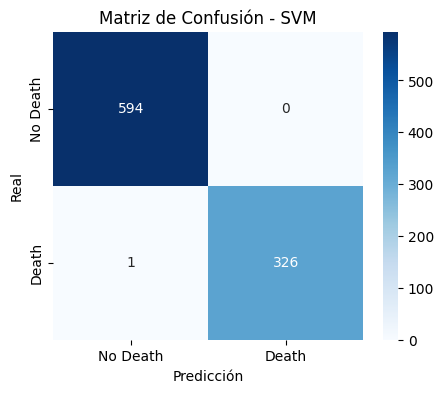

In [131]:
# Cargar datos
X, y = df_reducidoP3.drop(columns=["death"]), df_reducidoP3["death"]

# División en entrenamiento y validación (80%-20%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelo: KNN
modeloSVM = SVC()
modeloSVM.fit(X_train, y_train)

# Validación cruzada con predicciones
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(modeloSVM, X_valid, y_valid, cv=skf)

# Calcular matriz de confusión
cm = confusion_matrix(y_valid, y_pred)

# Reporte de clasificación
reporte = classification_report(y_valid, y_pred, output_dict=True)
accuracy = reporte["accuracy"]
precision = reporte["1"]["precision"]
recall = reporte["1"]["recall"]
f1_score = reporte["1"]["f1-score"]

# Imprimir métricas
print(f"Modelo: SVM (sobre df_reducidoP3)")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1_score:.4f}")

# Graficar matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Death", "Death"], yticklabels=["No Death", "Death"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVM")
plt.show()


Evaluando modelo: Logistic Regression


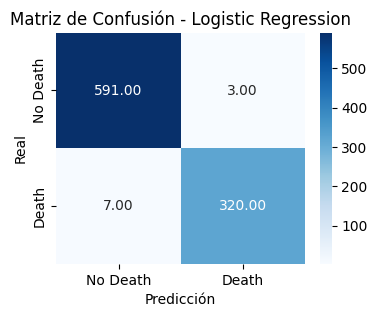


Evaluando modelo: KNN


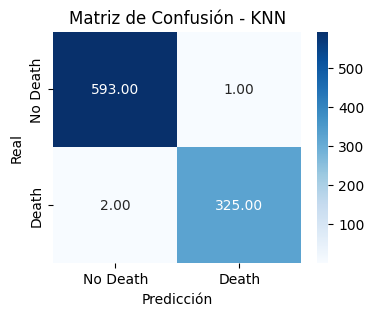


Evaluando modelo: SVM


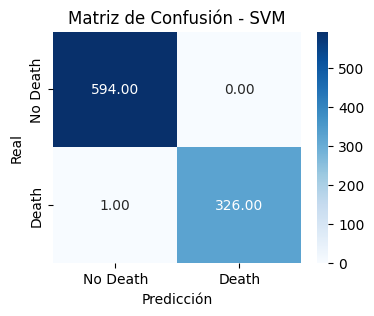


Evaluando modelo: Decision Tree


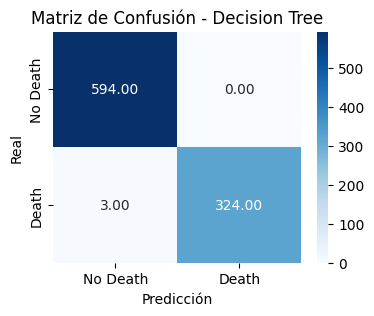


Evaluando modelo: Bagging Classifier


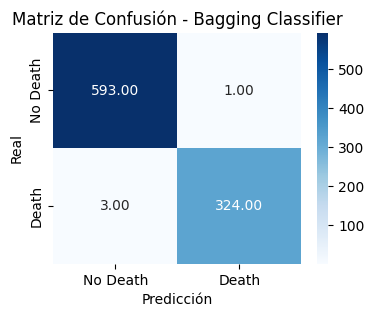


Evaluando modelo: Random Forest


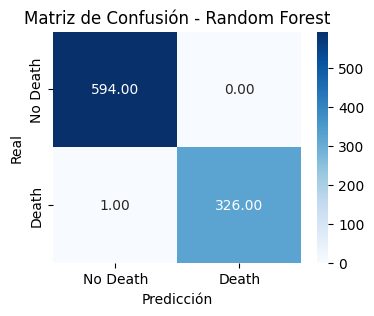

,Modelo,Accuracy,Precision,Recall,F1 Score
5,Random Forest,0.998914,1.000000,0.996942,0.998469
2,SVM,0.998914,1.000000,0.996942,0.998469
1,KNN,0.996743,0.996933,0.993884,0.995406
3,Decision Tree,0.996743,1.000000,0.990826,0.995392
4,Bagging Classifier,0.995657,0.996923,0.990826,0.993865
0,Logistic Regression,0.989142,0.990712,0.978593,0.984615


In [129]:
#una prueba de mi pack de modelos a ver cual desempeña mejor con el conjunto de datos, que son los mismos, pero cambiados el orden de columnas.
X, y = df_reducidoP3.drop(columns=["death"]), df_reducidoP3["death"]
evaluar_modelos(X,y)

Voy a elegir el modelo SVM

### 8.2 Carga de los datos test para predecir
Se trata del conjunto de datos nuevos que me llegan

In [132]:
test = pd.read_csv('data/sostenme-el-cubata/test.csv', index_col= 'id')
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
id,,,,,,,,,,,,,,,,,,,,,
1483,Flat,Fibrous,Brown,No Bruises,NaN,Free,Crowded,Broad,Chocolate,Tapering,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses
5111,Convex,Scaly,Red,No Bruises,Foul,Free,Close,Narrow,Buff,Tapering,...,Silky,White,White,Partial,White,One,Evanescent,White,Several,Paths
3569,Flat,Scaly,Red,Bruises,NaN,Free,Close,Broad,White,Tapering,...,Smooth,Gray,White,Partial,White,One,Pendant,Brown,Solitary,Wood
2426,Convex,Fibrous,Green,No Bruises,Foul,Free,Close,Broad,Gray,Enlarging,...,Silky,Brown,Buff,Partial,White,One,Large,Chocolate,Solitary,Paths
2749,Convex,Scaly,Green,Bruises,NaN,Free,Close,Broad,Purple,Tapering,...,Smooth,Gray,White,Partial,White,One,Pendant,Black,Solitary,Wood


In [133]:
test.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [134]:
test.head(2)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
id,,,,,,,,,,,,,,,,,,,,,
1483,Flat,Fibrous,Brown,No Bruises,NaN,Free,Crowded,Broad,Chocolate,Tapering,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses
5111,Convex,Scaly,Red,No Bruises,Foul,Free,Close,Narrow,Buff,Tapering,...,Silky,White,White,Partial,White,One,Evanescent,White,Several,Paths


In [135]:
column_mapping = {
    'cap-shape': 'cap_shape',
    'cap-surface': 'cap_surface',
    'cap-color': 'cap_color',
    'bruises': 'bruises',
    'odor': 'odor',
    'gill-attachment': 'gill_attachment',
    'gill-spacing': 'gill_spacing',
    'gill-size': 'gill_size',
    'gill-color': 'gill_color',
    'stalk-shape': 'stalk_shape',
    'stalk-root': 'stalk_root',
    'stalk-surface-above-ring': 'stalk_surface_above_ring',
    'stalk-surface-below-ring': 'stalk_surface_below_ring',
    'stalk-color-above-ring': 'stalk_color_above_ring',
    'stalk-color-below-ring': 'stalk_color_below_ring',
    'veil-type': 'veil_type',
    'veil-color': 'veil_color',
    'ring-number': 'ring_number',
    'ring-type': 'ring_type',
    'spore-print-color': 'spore_print_color',
    'population': 'population',
    'habitat': 'habitat'
}

test.rename(columns=column_mapping, inplace=True)


In [136]:
test = test[train.columns.drop('class')]  # 'class' es la variable objetivo y no está en test


In [137]:
test.head(2)

,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,bruises
id,,,,,,,,,,,,,,,,,,,,,
1483,Flat,Fibrous,Brown,NaN,Free,Crowded,Broad,Chocolate,Tapering,Equal,...,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses,No Bruises
5111,Convex,Scaly,Red,Foul,Free,Close,Narrow,Buff,Tapering,?,...,White,White,Partial,White,One,Evanescent,White,Several,Paths,No Bruises


In [138]:
test.isnull().sum()

cap_shape                      0
cap_surface                    0
cap_color                      0
odor                        1012
gill_attachment                0
gill_spacing                   0
gill_size                      0
gill_color                     0
stalk_shape                    0
stalk_root                     0
stalk_surface_above_ring       0
stalk_surface_below_ring       0
stalk_color_above_ring         0
stalk_color_below_ring         0
veil_type                      0
veil_color                     0
ring_number                    6
ring_type                      6
spore_print_color              0
population                     0
habitat                        0
bruises                        0
dtype: int64

In [139]:
test['ring_number'].unique()

array(['One', 'Two', nan], dtype=object)

In [140]:
# Filtrar las filas donde 'odor' son NaN
null_values_df = test[test[['odor']].isnull().any(axis=1)]

null_values_df

,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,bruises
id,,,,,,,,,,,,,,,,,,,,,
1483,Flat,Fibrous,Brown,NaN,Free,Crowded,Broad,Chocolate,Tapering,Equal,...,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses,No Bruises
3569,Flat,Scaly,Red,NaN,Free,Close,Broad,White,Tapering,Bulbous,...,Gray,White,Partial,White,One,Pendant,Brown,Solitary,Wood,Bruises
2749,Convex,Scaly,Green,NaN,Free,Close,Broad,Purple,Tapering,Bulbous,...,Gray,White,Partial,White,One,Pendant,Black,Solitary,Wood,Bruises
3613,Flat,Scaly,Brown,NaN,Free,Close,Broad,Purple,Tapering,Bulbous,...,White,Pink,Partial,White,One,Pendant,Brown,Several,Wood,Bruises
1740,Convex,Smooth,Green,NaN,Free,Crowded,Broad,Pink,Tapering,Equal,...,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses,No Bruises
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,Convex,Fibrous,Green,NaN,Free,Close,Broad,White,Tapering,Bulbous,...,White,Gray,Partial,White,One,Pendant,Black,Solitary,Wood,Bruises
2536,Convex,Scaly,Brown,NaN,Free,Close,Broad,Pink,Tapering,Bulbous,...,White,Gray,Partial,White,One,Pendant,Brown,Several,Wood,Bruises
1215,Convex,Scaly,Red,NaN,Free,Close,Broad,Brown,Tapering,Bulbous,...,Pink,White,Partial,White,One,Pendant,Brown,Solitary,Wood,Bruises


In [141]:
# Filtrar las filas donde 'ring_number' o 'ring_type' son NaN
null_values_df = test[test[['ring_number', 'ring_type']].isnull().any(axis=1)]

null_values_df

,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,bruises
id,,,,,,,,,,,,,,,,,,,,,
5787,Convex,Scaly,Cinnamon,Musty,Attached,Close,Broad,Yellow,Enlarging,Club,...,Cinnamon,Cinnamon,Partial,White,NaN,NaN,White,Clustered,Wood,No Bruises
5837,Flat,Scaly,Brown,Musty,Free,Close,Broad,Yellow,Enlarging,Club,...,Cinnamon,Cinnamon,Partial,White,NaN,NaN,White,Clustered,Wood,No Bruises
5967,Flat,Scaly,Red,Musty,Free,Close,Broad,White,Enlarging,Club,...,Cinnamon,Cinnamon,Partial,White,NaN,NaN,White,Clustered,Wood,No Bruises
6193,Convex,Scaly,Red,Musty,Free,Close,Broad,Yellow,Enlarging,Club,...,Cinnamon,Cinnamon,Partial,White,NaN,NaN,White,Clustered,Wood,No Bruises
6324,Flat,Scaly,Cinnamon,Musty,Attached,Close,Broad,White,Enlarging,Club,...,Cinnamon,Cinnamon,Partial,White,NaN,NaN,White,Clustered,Wood,No Bruises
5781,Flat,Scaly,Brown,Musty,Free,Close,Broad,White,Enlarging,Club,...,Cinnamon,Cinnamon,Partial,White,NaN,NaN,White,Clustered,Wood,No Bruises


Archivos que voy transformando desde test, nombre con una T

In [142]:
df_numericT = convert_to_numeric_better (test, is_train=False)
df_numericT.head(2)

/Users/angelg.villanueva/Documents/04_DATA/041_DATASCIENCE_BOOTCAMP/DS102024_2/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['grooves'] will be ignored
  warnings.warn(


,cap_shape_bell,cap_shape_c,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,cap_surface_fibrous,cap_surface_scaly,cap_surface_smooth,cap_color_brown,...,spore_print_color_yellow,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_wood,bruises_bruises,bruises_no bruises
id,,,,,,,,,,,,,,,,,,,,,
1483,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
5111,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


##### En busca del valor 'grooves'

In [143]:
# Buscar el valor 'grooves' en todas las columnas de tipo 'object'
grooves_rows = train[train.apply(lambda x: x.astype(str).str.contains('grooves', case=False, na=False).any(), axis=1)]

grooves_rows

,class,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,bruises
id,,,,,,,,,,,,,,,,,,,,,


In [144]:
# Buscar 'grooves' en todas las celdas de las columnas de tipo 'object'
grooves_in_all_columns = train[train.select_dtypes(include=['object']).apply(lambda x: x.str.contains('grooves', case=False, na=False)).any(axis=1)]
grooves_in_all_columns


,class,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,bruises
id,,,,,,,,,,,,,,,,,,,,,


#### Aplico las transformaciones aplicadas a train

In [145]:
df_reducidoT1 = df_numericT.drop(columns=to_drop)

df_reducidoT2 = df_reducidoT1[top_features]

df_reducidoT3 = df_reducidoT2[selected_features]
df_reducidoT3.head()

,odor_foul,stalk_surface_above_ring_silky,stalk_surface_below_ring_silky,gill_color_buff,gill_size_broad,ring_type_pendant,ring_type_large,bruises_bruises,stalk_surface_below_ring_smooth,spore_print_color_brown,...,stalk_color_above_ring_white,odor_creosote,stalk_root_club,stalk_root_equal,cap_surface_fibrous,habitat_grasses,stalk_surface_below_ring_fibrous,habitat_wood,stalk_surface_above_ring_fibrous,spore_print_color_green
id,,,,,,,,,,,,,,,,,,,,,
1483,0,0,0,0,1,0,0,0,1,1,...,1,0,0,1,1,1,0,0,0,0
5111,1,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3569,0,0,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
2426,1,1,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2749,0,0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


### 8.3 Predicción Modelo SVM (SVC)


In [147]:
predictions_submit = modeloSVM.predict(df_reducidoT3)
predictions_submit

array([0, 1, 0, ..., 0, 0, 0])

### 8.4 Elaboración Dataframe con mis predicciones

In [148]:
sample = pd.read_csv("data/sostenme-el-cubata/sample_submission.csv")
sample.head()

,id,class
0,1483,Poisonousa
1,5111,Edibla
2,3569,Poisonousa
3,2426,Edibla
4,2749,Poisonousa


In [150]:
submission = pd.DataFrame({"id": sample['id'], "class": predictions_submit})
submission

,id,class
0,1483,0
1,5111,1
2,3569,0
3,2426,1
4,2749,0
...,...,...
1969,2090,0
1970,2536,0
1971,1215,0
1972,1896,0


### 8.5. Comprobación para Kaggle.
CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [164]:
def chequeator(df_to_submit,version):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit['id'].all() == sample['id'].all():
                print("You're ready to submit!")
                submission.to_csv(f"Setas_submission_{version}.csv", index = False) #muy importante el index = False  
                img = Image.open("pulgarOK.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [ ]:
chequeator(submission,1)


You're ready to submit!
